# Proyek Analisis Data : E-Commerce Public Dataset

Kelompok:
- 10122079 - Hanna Septiani
- 10122096 - Muhammad Mizan Al Mujadid
- 10122104 - Dyandra Cissy Fadhillah
- 10122105  - Amira Sri Mulyani
- 10122114 - Stefanus Gratilio
- 220170203 - Desi Rosdiana

## List of Questions

- 10122079
1. Apa 10 kategori produk dengan penjualan tertinggi?

- 10122096
1. Apakah Lama Pengiriman berpengaruh terhadap review score?
2. Apakah highlight yang membuat customer memberikan review score yang kecil?
3. Apakah kesamaan negara asal antara seller dan customer berpengaruh terhadap jumlah pembelian?
4. Berapakah rata-rata jauh pengiriman yang sudah diterima berdasarkan seller state?
5. Apakah jauh pengiriman berdampak pada waktu pengiriman dan review score?

- 10122104
1. Apakah barang yang datang ke costumer melebihi tanggal estimasinya dapat mempengaruhi pembatalan pesanan?
2. Kategori barang apa yang paling banyak dibeli?

- 10122105
1. Apa 10 kategori produk dengan penjualan terendah?

- 10122114
1. Berapa kemungkinan harga pengiriman suatu barang yang memiliki berat, panjang, tinggi, dan lebar rata-rata dari seluruh data barang yang sudah ada?
2. Antara harga barang dan harga pengiriman, fitur mana yang lebih memengaruhi rating dari pembeli?
3. Bagaimana persebaran kategori barang pada setiap nilai review?

- 220170203
1. Berapakah rata rata  kategori terbesar dan terkecil dari jumlah foto yang dipublikasikan untuk produk?

## Library Preparation

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sea
from sklearn.linear_model import QuantileRegressor
from collections import Counter
from geopy.distance import geodesic

pd.options.mode.chained_assignment = None

## Data Wrangling

### Data Gathering

In [2]:
customers                         = pd.read_csv("./E-Commerce Public Dataset/customers_dataset.csv")
geolocation                       = pd.read_csv("./E-Commerce Public Dataset/geolocation_dataset.csv")
order_items                       = pd.read_csv("./E-Commerce Public Dataset/order_items_dataset.csv")
order_payments                    = pd.read_csv("./E-Commerce Public Dataset/order_payments_dataset.csv")
order_reviews                     = pd.read_csv("./E-Commerce Public Dataset/order_reviews_dataset.csv")
orders                            = pd.read_csv("./E-Commerce Public Dataset/orders_dataset.csv")
product_category_name_translation = pd.read_csv("./E-Commerce Public Dataset/product_category_name_translation.csv")
products                          = pd.read_csv("./E-Commerce Public Dataset/products_dataset.csv")
sellers                           = pd.read_csv("./E-Commerce Public Dataset/sellers_dataset.csv")

### Data Accessing

#### Customers Table

In [3]:
display(customers.head())

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Sellers Table

In [4]:
display(sellers.head())

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### Products Table

In [5]:
display(products.head())

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Product_Category_Name_Translation Table

In [6]:
display(product_category_name_translation.head())

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Orders Table

In [7]:
display(orders.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Order_Items Table

In [8]:
display(order_items.head())

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Order_Payments Table

In [9]:
display(order_payments.head())

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### Order_Reviews Table

In [10]:
display(order_reviews.head())

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Data Cleaning

#### Data Type Alteration

##### Tabel order_items

In [11]:
order_items["shipping_limit_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 112650 entries, 0 to 112649
Series name: shipping_limit_date
Non-Null Count   Dtype 
--------------   ----- 
112650 non-null  object
dtypes: object(1)
memory usage: 880.2+ KB


Pada tabel order_items, terlihat bahwa jenis data dari fitur shipping_limit_date adalah object, sedangkan isi dari fitur tersebut berupa tanggal dan jam. Sehingga tipe data dari fitur tersebut perlu dirubah menjadi datetime.

In [12]:
order_items["shipping_limit_date"] = order_items["shipping_limit_date"].astype("datetime64[ns]")

order_items["shipping_limit_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 112650 entries, 0 to 112649
Series name: shipping_limit_date
Non-Null Count   Dtype         
--------------   -----         
112650 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 880.2 KB


##### Tabel order_reviews

In [13]:
order_reviews[["review_creation_date", "review_answer_timestamp"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_creation_date     99224 non-null  object
 1   review_answer_timestamp  99224 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


Pada tabel order_reviews, terlihat bahwa jenis data dari fitur review_creation_date dan review_answer_timestamp adalah object, sedangkan isi dari fitur tersebut berupa tanggal dan jam. Sehingga tipe data dari fitur tersebut perlu dirubah menjadi datetime.

In [14]:
order_reviews["review_creation_date"]    = order_reviews["review_creation_date"].astype("datetime64[ns]")
order_reviews["review_answer_timestamp"] = order_reviews["review_answer_timestamp"].astype("datetime64[ns]")

order_reviews[["review_creation_date", "review_answer_timestamp"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_creation_date     99224 non-null  datetime64[ns]
 1   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.5 MB


##### Tabel orders

In [15]:
orders[["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_purchase_timestamp       99441 non-null  object
 1   order_approved_at              99281 non-null  object
 2   order_delivered_carrier_date   97658 non-null  object
 3   order_delivered_customer_date  96476 non-null  object
 4   order_estimated_delivery_date  99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


Pada tabel orders, terlihat bahwa jenis data dari fitur order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date dan order_estimated_delivery_date adalah object, sedangkan isi dari fitur tersebut berupa tanggal dan jam. Sehingga tipe data dari fitur tersebut perlu dirubah menjadi datetime.

In [16]:
orders["order_purchase_timestamp"]      = orders["order_purchase_timestamp"].astype("datetime64[ns]")
orders["order_approved_at"]             = orders["order_approved_at"].astype("datetime64[ns]")
orders["order_delivered_carrier_date"]  = orders["order_delivered_carrier_date"].astype("datetime64[ns]")
orders["order_delivered_customer_date"] = orders["order_delivered_customer_date"].astype("datetime64[ns]")
orders["order_estimated_delivery_date"] = orders["order_estimated_delivery_date"].astype("datetime64[ns]")

orders[["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_purchase_timestamp       99441 non-null  datetime64[ns]
 1   order_approved_at              99281 non-null  datetime64[ns]
 2   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 3   order_delivered_customer_date  96476 non-null  datetime64[ns]
 4   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 3.8 MB


##### Hasil Data Type Alteration

Proses Data Type Alteration merubah tipe data dari beberapa fitur data yang tipe datanya tidak sesuai dengan jenis data di dalamnya.<br>
Proses Data Type Alteration pada E-Commerce Public Dataset menemukan tipe data object pada fitur yang berisi data tanggal pada tabel order_items, order_reviews, dan orders. Sehingga tipe data pada fitur di tabel-tabel tersebut telah dirubah menjadi datetime.

#### Table Merging

##### Tabel products dan product_category_name_translation

Mengubah nama kategori produk di dalam tabel products(product_category_name) yang awalnya berbahasa Portugis, dengan nama produk dalam tabel product_category_name_translation(product_category_name_english) yang menggunakan bahasa Inggris.<br><br>Merubah nama fitur yang salah (product_name_lenght dan product_description_lenght).

In [17]:
products = products.join(product_category_name_translation.set_index("product_category_name"), "product_category_name", validate = "m:1")
products["product_category_name"] = products["product_category_name_english"]
products.drop("product_category_name_english", axis = 1, inplace = True)
products.rename(columns = {"product_name_lenght" : "product_name_length", "product_description_lenght" : "product_description_length"}, inplace = True)
del product_category_name_translation

display(products.head())

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


##### Tabel order_items dan products

Menggabungkan tabel order_items dan tabel products berdasarkan fitur product_id.

In [18]:
order_items = order_items.join(products.set_index("product_id"), "product_id", validate = "m:1")
order_items.drop("product_id", axis = 1, inplace = True)
del products

display(order_items.head())

,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


##### Tabel order_items dan sellers

Menggabungkan tabel order_items dan tabel products berdasarkan fitur seller_id.

In [19]:
order_items = order_items.join(sellers.set_index("seller_id"), "seller_id", validate = "m:1")
order_items.drop("seller_id", axis = 1, inplace = True)
del sellers

display(order_items.head())

,order_id,order_item_id,shipping_limit_date,price,freight_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR


##### Tabel orders dan customers

Menggabungkan tabel orders dan tabel customers berdasarkan fitur customer_id.

In [20]:
orders = orders.join(customers.set_index("customer_id"),"customer_id", validate = "1:1")
orders.drop(["customer_id", "customer_unique_id"], axis = 1, inplace = True)
del customers

display(orders.head())

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9195,santo andre,SP


##### Hasil Table Merging

Proses Table Merging menggabungkan beberapa data dari beberapa tabel yang relasi antara key feature-nya ialah antara one-to-many dan one-to-one.<br>
Proses Table Merging pada E-Commerce Public Dataset menghasilkan 4 tabel hasil penggabungan yakni:
1. Tabel order_payments.
2. Tabel order_items.
3. Tabel order_reviews.
4. Tabel orders.

#### Null Value Removal

##### Tabel order_payments

Tabel order_payments tidak memiliki data yang tidak memiliki nilai.

In [21]:
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

##### Tabel order_items

Beberapa data pada beberapa fitur pada tabel order_items tidak memiliki nilai, tetapi dapat dilihat bahwa fitur yang memiliki data yang tidak memiliki nilai terbanyak terdapat pada fitur product_category_name.

In [22]:
order_items.isnull().sum()

order_id                         0
order_item_id                    0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name         1627
product_name_length           1603
product_description_length    1603
product_photos_qty            1603
product_weight_g                18
product_length_cm               18
product_height_cm               18
product_width_cm                18
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
dtype: int64

Dikarenakan ada beberapa order yang tidak memiliki kategori produk, dan apabila produk yang memiliki nilai null pada fitur product_category_name dihapus akan mengurangi jumlah data yang bernilai null di fitur lain, maka order yang tidak memiliki nilai di fitur product_category_name akan dihapus.

In [23]:
order_items.dropna(axis = 0, how = "any", inplace = True, ignore_index = True)
order_items.isnull().sum()

order_id                      0
order_item_id                 0
shipping_limit_date           0
price                         0
freight_value                 0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
seller_zip_code_prefix        0
seller_city                   0
seller_state                  0
dtype: int64

##### Tabel order_reviews

Beberapa data pada fitur review_comment_title dan review_comment_message pada tabel order_reviews tidak memiliki nilai.

In [24]:
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Dikarenakan banyaknya data yang tidak memiliki nilai pada kedua fitur tersebut, maka kedua fitur tersebut akan dihapus dari tabel.

In [25]:
order_reviews.drop(["review_comment_title", "review_comment_message"], axis = 1, inplace = True)
order_reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

##### Tabel orders

Pada tabel orders, terdapat beberapa data yang tidak memiliki nilai pada fitur order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date.

In [26]:
orders.isnull().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

Setelah ditelusuri kembali, terlihat bahwa data pada tabel orders dapat dibagi kembali berdasarkan order_status, dikarenakan beberapa data yang tidak memiliki nilai berhubungan dengan status order pada saat itu. Sehingga, akan dibuat 7 DataFrame baru dengan order_status yang berbeda-beda, yang lalu data dengan order_status tersebut dihapus dari tabel orders.

In [27]:
canceled_orders    = orders[orders["order_status"] == "canceled"]
created_orders     = orders[orders["order_status"] == "created"]
shipped_orders     = orders[orders["order_status"] == "shipped"]
unavailable_orders = orders[orders["order_status"] == "unavailable"]
invoiced_orders    = orders[orders["order_status"] == "invoiced"]
processing_orders  = orders[orders["order_status"] == "processing"]
approved_orders    = orders[orders["order_status"] == "approved"]

orders.drop(orders[orders["order_status"] == "canceled"].index, inplace = True)
orders.drop(orders[orders["order_status"] == "created"].index, inplace = True)
orders.drop(orders[orders["order_status"] == "unavailable"].index, inplace = True)
orders.drop(orders[orders["order_status"] == "invoiced"].index, inplace = True)
orders.drop(orders[orders["order_status"] == "processing"].index, inplace = True)
orders.drop(orders[orders["order_status"] == "shipped"].index, inplace = True)
orders.drop(orders[orders["order_status"] == "approved"].index, inplace = True)

orders.isnull().sum()

order_id                          0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
dtype: int64

Setelah dilakukan pemindahan dan penghapusan data, terlihat bahwa masih terdapat beberapa data dengan order_status "delivered" yang tidak memiliki nilai pada beberapa fitur, untuk menghilangkan anomalitas, maka data-data yang tidak memiliki nilai tersebut akan dihapus, lalu tabel orders akan dirubah namanya menjadi delivered_orders dikarenakan status dari semua data di tabel tersebut adalah "delivered".

In [28]:
orders.dropna(axis = 0, how = "any", inplace = True, ignore_index = True)
delivered_orders = orders
del orders

delivered_orders.isnull().sum()

order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

Setelah itu, akan dilakukan pengecekan kembali kepada 7 tabel baru lain yang merupakan pecahan dari tabel orders. Pertama akan dilakukan pengecekan nilai null pada approved_orders, unavailable_orders, invoiced_orders, dan processing_orders.

In [29]:
approved_orders.isnull().sum()

order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     2
order_delivered_customer_date    2
order_estimated_delivery_date    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [30]:
unavailable_orders.isnull().sum()

order_id                           0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     609
order_delivered_customer_date    609
order_estimated_delivery_date      0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
dtype: int64

In [31]:
invoiced_orders.isnull().sum()

order_id                           0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     314
order_delivered_customer_date    314
order_estimated_delivery_date      0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
dtype: int64

In [32]:
processing_orders.isnull().sum()

order_id                           0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     301
order_delivered_customer_date    301
order_estimated_delivery_date      0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
dtype: int64

Apabila diperhatikan, dapat dilihat bahwa keempat tabel tersebut memiliki kesamaan, yani data pada fitur order_delivered_carrier_date dan order_delivered_customer_date tidak memiliki nilai. Oleh sebab itu, keempat tabel tersebut dapat disatukan menjadi tabel baru, yang lalu kedua fitur yang tidak memiliki nilai tersebut akan dihapus.

In [33]:
approved_orders = pd.concat([approved_orders, unavailable_orders, invoiced_orders, processing_orders], ignore_index = True)
approved_orders.drop(["order_delivered_carrier_date", "order_delivered_customer_date"], axis = 1, inplace = True)
del unavailable_orders, invoiced_orders, processing_orders

approved_orders.isnull().sum()

order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_estimated_delivery_date    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

Setelah itu, akan dilakukan pengecekan fitur yang tidak memiliki nilai di tabel created_orders dan shipped_orders.

In [34]:
created_orders.isnull().sum()

order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                5
order_delivered_carrier_date     5
order_delivered_customer_date    5
order_estimated_delivery_date    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [35]:
shipped_orders.isnull().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1107
order_estimated_delivery_date       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

Dapat terlihat bahwa pada tabel created_orders, terdapat 3 fitur di mana datanya tidak memiliki nilai, sedangkan pada tabel shipped_orders, data yang tidak memiliki nilai hanya terdapat pada fitur order_delivered_customer_date. Sehingga, pada tabel created_orders, dapat dilakukan penghapusan ketiga fitur tersebut, dan pada tabel shipped_orders dapat dilakukan penghapusan terhadap fitur order_delivered_customer_date.

In [36]:
created_orders.drop(["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"], axis = 1, inplace = True)
shipped_orders.drop("order_delivered_customer_date", axis = 1, inplace = True)

created_orders.isnull().sum()

order_id                         0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [37]:
shipped_orders.isnull().sum()

order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_estimated_delivery_date    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

Terakhir, pada tabel canceled_errors terdapat 3 fitur di mana data pada fitur tersebut tidak memiliki nilai.

In [38]:
canceled_orders.isnull().sum()

order_id                           0
order_status                       0
order_purchase_timestamp           0
order_approved_at                141
order_delivered_carrier_date     550
order_delivered_customer_date    619
order_estimated_delivery_date      0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
dtype: int64

Dikarenakan banyaknya data yang tidak memiliki nilai pada tabel canceled_errors, dan apabila diperhatikan, ada beberapa data yang tidak memiliki nilai hanya di tiga, dua, satu, ataupun tidak di ketiga fitur tersebut, maka data pada canceled_orders akan dipisah dan lalu digabung dengan tabel delivered_orders(data pada seluruh fitur memiliki nilai), shipped_orders(hanya fitur order_delivered_customer_date tidak memiliki nilai), approved_orders(fitur order_delivered_customer_date dan order_delivered_carrier_date tidak memiliki nilai), dan created_orders(ketiga fitur tidak memiliki nilai).

In [39]:
delivered = canceled_orders[canceled_orders["order_delivered_customer_date"].notnull()]
shipped   = canceled_orders[(canceled_orders["order_delivered_carrier_date"].notnull()) & (canceled_orders["order_delivered_customer_date"].isnull())]
approved  = canceled_orders[(canceled_orders["order_approved_at"].notnull()) & (canceled_orders["order_delivered_customer_date"].isnull()) & (canceled_orders["order_delivered_carrier_date"].isnull())]
created   = canceled_orders[(canceled_orders["order_approved_at"].isnull()) & (canceled_orders["order_delivered_carrier_date"].isnull()) & (canceled_orders["order_delivered_customer_date"].isnull())]

shipped.drop("order_delivered_customer_date", axis = 1, inplace = True)
approved.drop(["order_delivered_customer_date", "order_delivered_carrier_date"], axis = 1, inplace = True)
created.drop(["order_delivered_customer_date", "order_delivered_carrier_date", "order_approved_at"], axis = 1, inplace = True)

delivered_orders = pd.concat([delivered_orders, delivered], ignore_index = True)
shipped_orders   = pd.concat([shipped_orders, shipped], ignore_index = True)
approved_orders  = pd.concat([approved_orders, approved], ignore_index = True)
created_orders   = pd.concat([created_orders, created], ignore_index = True)

del canceled_orders, delivered, shipped, approved, created

In [40]:
delivered_orders.isnull().sum()

order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [41]:
shipped_orders.isnull().sum()

order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_estimated_delivery_date    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [42]:
approved_orders.isnull().sum()

order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_estimated_delivery_date    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [43]:
created_orders.isnull().sum()

order_id                         0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

##### Hasil Null Value Removal

Pada proses Null Value Removal, pada tabel-tabel yang datanya tidak memiliki nilai pada fitur-fitur tertentu, akan dilakukan salah satu atau beberapa hal tersebut:
1. Penghapusan data yang tidak memiliki nilai.
2. Penghapusan fitur yang salah satu atau beberapa datanya tidak memiliki nilai pada tabel tersebut.
3. Apabila terlihat suatu pola yang menyebabkan adanya data yang tidak memiliki nilai, maka tabel tersebut akan dipecah sesuai dengan fitur yang menyebabkan kemunculan nullitas pada data.

Proses Null Value Removal pada E-Commerce Public Dataset menghasilkan 3 tabel yang sama seperti hasil dari proses Table Merging, dan  4 tabel baru yang merupakan pecahan dari tabel orders berdasarkan order_status-nya. Ketujuh tabel tersebut ialah:
1. Tabel order_payments.
2. Tabel order_items.
3. Tabel order_reviews.
4. Tabel delivered_orders.
5. Tabel shipped_orders.
6. Tabel approved_orders.
7. Tabel created_orders.

## Exploratory Data Analysis

### Tabel order_payments

Tabel order_payments berguna untuk menunjukan urutan pembayaran, tipe pembayaran, angsuran pembayaran, dan besar pembayaran dari satu order_id.

In [44]:
display(order_payments.head())

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [45]:
order_payments.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_sequential,103886.0,1.092679,0.706584,1.0,1.00,1.0,1.0000,29.00
payment_installments,103886.0,2.853349,2.687051,0.0,1.00,1.0,4.0000,24.00
payment_value,103886.0,154.100380,217.494064,0.0,56.79,100.0,171.8375,13664.08


In [46]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


<b>Penjelasan Fitur Tabel</b>

1. order_id<br>
Fitur ini berisi id dari setiap order.Fitur ini merupakan key yang menghubungkan tabel ini dengan tabel lain yang memiliki fitur yang sama. Pada tabel ini, data pada fitur ini tidak unik (mengandung data duplikat), dikarenakan pada satu order ada kemungkinan terdapat dua atau lebih urutan (payment_sequential), tipe (payment_type), atau angsuran pembayaran (payment_installments).

2. payment_sequential<br>
Fitur ini berisi urutan pembayaran pada order_id.

3. payment_type<br>
Fitur ini berisi tipe pembayaran yang dilakukan pada order_id.

4. payment_installments<br>
Fitur ini berisi angsuran pembayaran pada order_id.

5. payment_value<br>
Fitur ini berisi besar pembayaran pada order_id.

### Tabel order_items

Tabel order_items berguna untuk menunjukan id, limit tanggal pengiriman, harga, harga pengiriman, kategori, panjang nama, panjang deskripsi, banyak foto, berat (dalam gram), panjang, tinggi, dan lebar barang (dalam cm), kode pos, kota, dan negara penjual barang dari satu order_id.

In [47]:
display(order_items.head())

,order_id,order_item_id,shipping_limit_date,price,freight_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR


In [48]:
order_items.describe().T

,count,mean,min,25%,50%,75%,max,std
order_item_id,111022.0,1.198231,1.0,1.0,1.0,1.0,21.0,0.706934
shipping_limit_date,111022,2018-01-08 09:31:21.284997632,2016-09-19 00:15:34,2017-09-21 04:30:36.750000128,2018-01-28 22:55:38,2018-05-10 22:55:17.750000128,2020-04-09 22:35:08,NaN
price,111022.0,120.738772,0.85,39.9,74.99,134.9,6735.0,183.292804
freight_value,111022.0,20.025485,0.0,13.08,16.31,21.18,409.68,15.841529
product_name_length,111022.0,48.774432,5.0,42.0,52.0,57.0,76.0,10.025942
product_description_length,111022.0,787.870854,4.0,348.0,602.5,987.0,3992.0,652.172826
product_photos_qty,111022.0,2.209562,1.0,1.0,1.0,3.0,20.0,1.721434
product_weight_g,111022.0,2099.897507,0.0,300.0,700.0,1800.0,40425.0,3754.972723
product_length_cm,111022.0,30.21221,7.0,18.0,25.0,38.0,105.0,16.190473
product_height_cm,111022.0,16.624966,2.0,8.0,13.0,20.0,105.0,13.468184


In [49]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111022 entries, 0 to 111021
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    111022 non-null  object        
 1   order_item_id               111022 non-null  int64         
 2   shipping_limit_date         111022 non-null  datetime64[ns]
 3   price                       111022 non-null  float64       
 4   freight_value               111022 non-null  float64       
 5   product_category_name       111022 non-null  object        
 6   product_name_length         111022 non-null  float64       
 7   product_description_length  111022 non-null  float64       
 8   product_photos_qty          111022 non-null  float64       
 9   product_weight_g            111022 non-null  float64       
 10  product_length_cm           111022 non-null  float64       
 11  product_height_cm           111022 non-

<b>Penjelasan Fitur Tabel</b>

1. order_id<br>
Fitur ini berisi id dari setiap order.Fitur ini merupakan key yang menghubungkan tabel ini dengan tabel lain yang memiliki fitur yang sama. Pada tabel ini, data pada fitur ini tidak unik (mengandung data duplikat), dikarenakan pada satu order ada kemungkinan terdapat dua atau lebih item yang dibeli (order_item_id).

2. order_item_id<br>
Fitur ini berisi id item yang dibeli pada order_id.

3. shipping_limit_date<br>
Fitur ini berisi limit tanggal pengiriman barang yang dibeli pada order_id.

4. price<br>
Fitur ini berisi harga barang yang dibeli pada order_id.

5. freight_value<br>
Fitur ini berisi harga pengiriman barang yang dibeli pada order_id.

6. product_category_name<br>
Fitur ini berisi kategori barang yang dibeli pada order_id.

7. product_name_length<br>
Fitur ini berisi panjang nama barang yang dibeli pada order_id.

8. product_description_length<br>
Fitur ini berisi panjang deskripsi barang yang dibeli pada order_id.

9. product_photos_qty<br>
Fitur ini berisi banyak foto barang yang dibeli pada order_id.

10. product_weight_g<br>
Fitur ini berisi berat barang dalam gram yang dibeli pada order_id.

11. product_length_cm<br>
Fitur ini berisi panjang barang dalam cm yang dibeli pada order_id.

12. product_height_cm<br>
Fitur ini berisi tinggi barang dalam cm yang dibeli pada order_id.

13. product_width_cm<br>
Fitur ini berisi lebar barang dalam cm yang dibeli pada order_id.

14. seller_zip_code_prefix<br>
Fitur ini berisi kode pos penjual barang yang dibeli pada order_id.

15. seller_city<br>
Fitur ini berisi kota penjual barang yang dibeli pada order_id.

16. seller_state<br>
Fitur ini berisi negara penjual barang yang dibeli pada order_id.

### Tabel order_reviews

Tabel order_reviews berguna untuk menunjukan id, skor, tanggal pembuatan, waktu balasan review dari satu order_id.

In [50]:
display(order_reviews.head())

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:53


In [51]:
order_reviews.describe().T

,count,mean,min,25%,50%,75%,max,std
review_score,99224.0,4.086421,1.0,4.0,5.0,5.0,5.0,1.347579
review_creation_date,99224,2018-01-12 20:49:23.948238336,2016-10-02 00:00:00,2017-09-23 00:00:00,2018-02-02 00:00:00,2018-05-16 00:00:00,2018-08-31 00:00:00,NaN
review_answer_timestamp,99224,2018-01-16 00:23:56.977938688,2016-10-07 18:32:28,2017-09-27 01:53:27.249999872,2018-02-04 22:41:47.500000,2018-05-20 12:11:21.500000,2018-10-29 12:27:35,NaN


In [52]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


<b>Penjelasan Fitur Tabel</b>

1. review_id<br>
Fitur ini berisi id review pada order_id.

2. order_id<br>
Fitur ini berisi id dari setiap order.Fitur ini merupakan key yang menghubungkan tabel ini dengan tabel lain yang memiliki fitur yang sama. Pada tabel ini, data pada fitur ini tidak unik (mengandung data duplikat), dikarenakan pada satu order pembeli dapat mengganti ratingnya.

3. review_score<br>
Fitur ini berisi skor review pada order_id.

4. review_creation_date<br>
Fitur ini berisi tanggal pembuatan review pada order_id.

5. review_answer_timestamp<br>
Fitur ini berisi waktu balasan review pada order_id.

### Tabel created_orders

Tabel created_orders berguna untuk menunjukan id, status, waktu pembelian, estimasi pengiriman barang, kode pos, kota, dan negara pembeli dari pesanan yang baru dibuat (order_status = created).

In [53]:
display(created_orders.head())

,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
0,b5359909123fa03c50bdb0cfed07f098,created,2017-12-05 01:07:52,2018-01-11,15300,general salgado,SP
1,dba5062fbda3af4fb6c33b1e040ca38f,created,2018-02-09 17:21:04,2018-03-07,73401,brasilia,DF
2,7a4df5d8cff4090e541401a20a22bb80,created,2017-11-25 11:10:33,2017-12-12,22621,rio de janeiro,RJ
3,35de4050331c6c644cddc86f4f2d0d64,created,2017-12-05 01:07:58,2018-01-08,93025,sao leopoldo,RS
4,90ab3e7d52544ec7bc3363c82689965f,created,2017-11-06 13:12:34,2017-12-01,87720,paranavai,PR


Ada beberapa pesanan yang baru dibuat tetapi lalu dibatalkan oleh pembeli (order_status = canceled).

In [54]:
created_orders[created_orders["order_status"] != "created"].head()

,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
5,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28 15:26:39,2018-09-12,1151,sao paulo,SP
6,ed3efbd3a87bea76c2812c66a0b32219,canceled,2018-09-20 13:54:16,2018-10-17,33030,santa luzia,MG
7,df8282afe61008dc26c6c31011474d02,canceled,2017-03-04 12:14:30,2017-04-10,68742,castanhal,PA
8,8d4c637f1accf7a88a4555f02741e606,canceled,2018-08-29 16:27:49,2018-09-13,13059,campinas,SP
9,7a9d4c7f9b068337875b95465330f2fc,canceled,2017-05-01 16:12:39,2017-05-30,5752,sao paulo,SP


In [55]:
created_orders.describe().T

,count,mean,min,25%,50%,75%,max,std
order_purchase_timestamp,146,2018-02-15 15:04:24.356164352,2016-10-04 19:41:32,2017-08-24 12:05:14.500000,2018-06-14 17:52:24.500000,2018-08-22 11:57:29.500000,2018-10-17 17:30:18,NaN
order_estimated_delivery_date,146,2018-03-09 19:13:58.356164352,2016-10-24 00:00:00,2017-09-21 06:00:00,2018-07-05 00:00:00,2018-09-12 00:00:00,2018-11-12 00:00:00,NaN
customer_zip_code_prefix,146.0,31942.69863,1042.0,9030.75,18854.5,48187.0,97543.0,30039.458999


In [56]:
created_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       146 non-null    object        
 1   order_status                   146 non-null    object        
 2   order_purchase_timestamp       146 non-null    datetime64[ns]
 3   order_estimated_delivery_date  146 non-null    datetime64[ns]
 4   customer_zip_code_prefix       146 non-null    int64         
 5   customer_city                  146 non-null    object        
 6   customer_state                 146 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 8.1+ KB


<b>Penjelasan Fitur Tabel</b>

1. order_id<br>
Fitur ini berisi id dari setiap order. Fitur ini merupakan primary key dari tabel ini, dan merupakan penghubung antara tabel ini dengan tabel lain. Sehingga fitur ini memiliki isi data yang unik (tidak memiliki duplikat).

2. order_status<br>
Fitur ini berisi status dari setiap order.

3. order_purchase_timestamp<br>
Fitur ini berisi waktu pembelian dari setiap order.

4. order_estimated_delivery_date<br>
Fitur ini berisi estimasi pengiriman barang dari setiap order.

5. customer_zip_code_prefix<br>
Fitur ini berisi kode pos pembeli dari setiap order.

6. customer_city<br>
Fitur ini berisi kota pembeli dari setiap order.

7. customer_state<br>
Fitur ini berisi negara pembeli dari setiap order.

### Tabel approved_orders

Tabel approved_orders berguna untuk menunjukan id, status, waktu pembelian, waktu persetujuan, estimasi pengiriman barang, kode pos, kota, dan negara pembeli dari pesanan yang baru disetujui (order_status = created).

In [57]:
display(approved_orders.head())

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
0,a2e4c44360b4a57bdff22f3a4630c173,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,2017-03-01,35590,lagoa da prata,MG
1,132f1e724165a07f6362532bfb97486e,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,2017-05-22,8255,sao paulo,SP
2,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,2017-12-05,89288,sao bento do sul,SC
3,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,2018-02-16,11701,praia grande,SP
4,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,2017-09-05,2318,sao paulo,SP


Tabel ini juga berisi pesanan yang persediaan barangnya tidak ada (order_status = unavailable).

In [58]:
display(approved_orders[approved_orders["order_status"] == "unavailable"].head())

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
2,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,2017-12-05,89288,sao bento do sul,SC
3,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,2018-02-16,11701,praia grande,SP
4,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,2017-09-05,2318,sao paulo,SP
5,d57e15fb07fd180f06ab3926b39edcd2,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,2018-02-06,48607,paulo afonso,BA
6,2f634e2cebf8c0283e7ef0989f77d217,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,2017-10-27,5017,sao paulo,SP


Tabel ini juga berisi pesanan yang sedang ditagih (order_status = invoiced).

In [59]:
display(approved_orders[approved_orders["order_status"] == "invoiced"].head())

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
611,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-05-09,98900,santa rosa,RS
612,0760a852e4e9d89eb77bf631eaaf1c84,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,2018-08-21,88140,santo amaro da imperatriz,SC
613,38b7efdf33dd5561f4f5d4f6e07b0414,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,2017-08-28,23025,rio de janeiro,RJ
614,51b0dccc8596ce37a930dff2d63a10a2,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,2017-06-06,32400,ibirite,MG
615,5504eaa5a86eb25fa666cf2e6b96c701,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,2017-12-20,24445,sao goncalo,RJ


Tabel ini juga berisi pesanan yang sedang diproses (order_status = processing).

In [60]:
display(approved_orders[approved_orders["order_status"] == "processing"].head())

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
925,15bed8e2fec7fdbadb186b57c46c92f2,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,2017-10-03,3436,sao paulo,SP
926,d3c8851a6651eeff2f73b0e011ac45d0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,2016-12-09,3531,sao paulo,SP
927,6a6c7d523fd59eb5bbefc007331af717,processing,2017-11-24 20:09:33,2017-11-24 23:15:15,2017-12-20,6519,santana de parnaiba,SP
928,745e1d4a7f8c4b548881788d4113bb1d,processing,2017-11-17 06:34:36,2017-11-18 02:15:40,2017-12-12,12230,sao jose dos campos,SP
929,1d52ba7197c7acebbb4f826f6585536f,processing,2017-02-13 18:32:55,2017-02-13 18:43:55,2017-04-04,24210,niteroi,RJ


Ada beberapa pesanan yang sudah disetujui tetapi lalu dibatalkan oleh pembeli (order_status = canceled).

In [61]:
display(approved_orders[approved_orders["order_status"] == "canceled"].head())

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
1226,1b9ecfe83cdc259250e1a8aca174f0ad,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,2018-08-14,5514,sao paulo,SP
1227,0966b61e30c4a07edbd7523f59b3f3e4,canceled,2018-05-22 18:50:55,2018-05-22 19:17:15,2018-07-03,28898,rio das ostras,RJ
1228,9021cf1919f615a121410790dcce848f,canceled,2018-07-04 16:05:56,2018-07-06 02:55:16,2018-08-22,39230,buenopolis,MG
1229,a39d3db795a5cf4c8b6c9dd050f0d326,canceled,2017-03-13 16:12:24,2017-03-13 16:12:24,2017-03-30,9050,santo andre,SP
1230,375f80ffc05feb35ce2680f1fa490575,canceled,2017-06-13 21:10:05,2017-06-13 21:22:35,2017-07-06,20560,rio de janeiro,RJ


In [62]:
approved_orders.describe().T

,count,mean,min,25%,50%,75%,max,std
order_purchase_timestamp,1635,2017-10-10 01:06:41.331498752,2016-09-05 00:15:34,2017-06-02 11:26:41.500000,2017-10-21 10:38:30,2018-02-04 06:40:24,2018-08-24 06:58:50,NaN
order_approved_at,1635,2017-10-10 19:11:15.590213888,2016-10-04 10:26:40,2017-06-03 09:53:41.500000,2017-10-21 10:49:26,2018-02-04 16:12:23,2018-08-24 11:45:18,NaN
order_estimated_delivery_date,1635,2017-11-03 17:48:19.816513792,2016-09-30 00:00:00,2017-06-29 12:00:00,2017-11-10 00:00:00,2018-03-01 12:00:00,2018-08-29 00:00:00,NaN
customer_zip_code_prefix,1635.0,31693.540061,1012.0,8396.0,20270.0,45076.5,99960.0,29216.439376


In [63]:
approved_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       1635 non-null   object        
 1   order_status                   1635 non-null   object        
 2   order_purchase_timestamp       1635 non-null   datetime64[ns]
 3   order_approved_at              1635 non-null   datetime64[ns]
 4   order_estimated_delivery_date  1635 non-null   datetime64[ns]
 5   customer_zip_code_prefix       1635 non-null   int64         
 6   customer_city                  1635 non-null   object        
 7   customer_state                 1635 non-null   object        
dtypes: datetime64[ns](3), int64(1), object(4)
memory usage: 102.3+ KB


<b>Penjelasan Fitur Tabel</b>

1. order_id<br>
Fitur ini berisi id dari setiap order. Fitur ini merupakan primary key dari tabel ini, dan merupakan penghubung antara tabel ini dengan tabel lain. Sehingga fitur ini memiliki isi data yang unik (tidak memiliki duplikat).

2. order_status<br>
Fitur ini berisi status dari setiap order.

3. order_purchase_timestamp<br>
Fitur ini berisi waktu pembelian dari setiap order.

4. order_approved_at<br>
Fitur ini berisi waktu persetujuan dari setiap order.

5. order_estimated_delivery_date<br>
Fitur ini berisi estimasi pengiriman barang dari setiap order.

6. customer_zip_code_prefix<br>
Fitur ini berisi kode pos pembeli dari setiap order.

7. customer_city<br>
Fitur ini berisi kota pembeli dari setiap order.

8. customer_state<br>
Fitur ini berisi negara pembeli dari setiap order.

### Tabel shipped_orders

Tabel approved_orders berguna untuk menunjukan id, status, waktu pembelian, waktu persetujuan, waktu penerimaan barang oleh pengangkut, estimasi pengiriman barang, kode pos, kota, dan negara pembeli dari pesanan yang sudah dikirim (order_status = shipped).

In [64]:
display(shipped_orders.head())

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
0,ee64d42b8cf066f35eac1cf57de1aa85,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,2018-06-28,13215,jundiai,SP
1,6942b8da583c2f9957e990d028607019,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,2018-02-07,38600,paracatu,MG
2,36530871a5e80138db53bcfd8a104d90,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,2017-06-08,54762,camaragibe,PE
3,4d630f57194f5aba1a3d12ce23e71cd9,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,2017-12-13,91450,porto alegre,RS
4,3b4ad687e7e5190db827e1ae5a8989dd,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,2018-08-03,20910,rio de janeiro,RJ


Ada beberapa pesanan yang sudah dikirim tetapi lalu dibatalkan oleh pembeli (order_status = canceled).

In [65]:
display(shipped_orders[shipped_orders["order_status"] == "canceled"].head())

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
1107,714fb133a6730ab81fa1d3c1b2007291,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,2018-02-22,9961,diadema,SP
1108,3a129877493c8189c59c60eb71d97c29,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,2018-02-23,87013,maringa,PR
1109,8a9cce19aa49e055f2babb81d5a71c40,canceled,2018-02-01 10:04:20,2018-02-03 02:52:42,2018-02-05 20:41:28,2018-02-23,11750,peruibe,SP
1110,c1049eef89915c6beb3604bf3d6588d7,canceled,2018-02-05 23:08:11,2018-02-05 23:29:26,2018-02-09 22:13:01,2018-03-07,23073,rio de janeiro,RJ
1111,885935156ba43094f3ae95f3c14e0381,canceled,2018-02-02 16:06:44,2018-02-06 04:32:39,2018-02-07 20:48:31,2018-03-08,22790,rio de janeiro,RJ


In [66]:
shipped_orders.describe().T

,count,mean,min,25%,50%,75%,max,std
order_purchase_timestamp,1176,2017-12-09 09:35:40.852891136,2016-09-04 21:15:19,2017-07-29 18:52:22.750000128,2018-01-20 04:46:06,2018-04-03 13:37:51.500000,2018-09-03 09:06:57,NaN
order_approved_at,1176,2017-12-09 21:02:27.615646208,2016-10-05 03:10:59,2017-07-30 11:38:25.500000,2018-01-20 16:56:36,2018-04-03 15:19:19.249999872,2018-09-03 17:40:06,NaN
order_delivered_carrier_date,1176,2017-12-13 03:38:19.577380864,2016-10-11 16:12:23,2017-08-01 16:55:33.750000128,2018-01-24 18:52:50.500000,2018-04-05 20:55:02.500000,2018-09-04 15:25:00,NaN
order_estimated_delivery_date,1176,2018-01-03 12:31:50.204081664,2016-10-20 00:00:00,2017-08-24 18:00:00,2018-02-16 00:00:00,2018-04-30 00:00:00,2018-09-18 00:00:00,NaN
customer_zip_code_prefix,1176.0,35360.190476,1014.0,13235.0,25582.5,57396.75,99990.0,26727.822673


In [67]:
shipped_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       1176 non-null   object        
 1   order_status                   1176 non-null   object        
 2   order_purchase_timestamp       1176 non-null   datetime64[ns]
 3   order_approved_at              1176 non-null   datetime64[ns]
 4   order_delivered_carrier_date   1176 non-null   datetime64[ns]
 5   order_estimated_delivery_date  1176 non-null   datetime64[ns]
 6   customer_zip_code_prefix       1176 non-null   int64         
 7   customer_city                  1176 non-null   object        
 8   customer_state                 1176 non-null   object        
dtypes: datetime64[ns](4), int64(1), object(4)
memory usage: 82.8+ KB


<b>Penjelasan Fitur Tabel</b>

1. order_id<br>
Fitur ini berisi id dari setiap order. Fitur ini merupakan primary key dari tabel ini, dan merupakan penghubung antara tabel ini dengan tabel lain. Sehingga fitur ini memiliki isi data yang unik (tidak memiliki duplikat).

2. order_status<br>
Fitur ini berisi status dari setiap order.

3. order_purchase_timestamp<br>
Fitur ini berisi waktu pembelian dari setiap order.

4. order_approved_at<br>
Fitur ini berisi waktu persetujuan dari setiap order.

5. order_delivered_carrier_date<br>
Fitur ini berisi waktu penerimaan barang oleh pengangkut dari setiap order.

6. order_estimated_delivery_date<br>
Fitur ini berisi estimasi pengiriman barang dari setiap order.

7. customer_zip_code_prefix<br>
Fitur ini berisi kode pos pembeli dari setiap order.

8. customer_city<br>
Fitur ini berisi kota pembeli dari setiap order.

9. customer_state<br>
Fitur ini berisi negara pembeli dari setiap order.

### Tabel delivered_orders

Tabel approved_orders berguna untuk menunjukan id, status, waktu pembelian, waktu persetujuan, waktu penerimaan barang oleh pengangkut, waktu penerimaan barang oleh pembeli, estimasi pengiriman barang, kode pos, kota, dan negara pembeli dari pesanan yang sudah diterima (order_status = delivered).

In [68]:
display(delivered_orders.head())

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9195,santo andre,SP


Ada beberapa pesanan yang sudah diterima tetapi lalu dibatalkan oleh pembeli (order_status = canceled).

In [69]:
display(delivered_orders[delivered_orders["order_status"] == "canceled"].head())

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
96455,1950d777989f6a877539f53795b4c3c3,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09,32071,contagem,MG
96456,dabf2b0e35b423f94618bf965fcb7514,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30,5846,sao paulo,SP
96457,770d331c84e5b214bd9dc70a10b829d0,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29,20091,rio de janeiro,RJ
96458,8beb59392e21af5eb9547ae1a9938d06,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30,20091,rio de janeiro,RJ
96459,65d1e226dfaeb8cdc42f665422522d14,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25,22770,rio de janeiro,RJ


In [70]:
delivered_orders.describe().T

,count,mean,min,25%,50%,75%,max,std
order_purchase_timestamp,96461,2018-01-01 23:53:26.642249216,2016-09-15 12:16:38,2017-09-14 09:28:28,2018-01-20 19:59:42,2018-05-05 18:33:24,2018-08-29 15:00:37,NaN
order_approved_at,96461,2018-01-02 10:10:06.480142336,2016-09-15 12:16:38,2017-09-14 14:30:14,2018-01-22 13:49:00,2018-05-06 10:30:49,2018-08-29 15:10:26,NaN
order_delivered_carrier_date,96461,2018-01-05 05:21:04.508827136,2016-10-08 10:34:01,2017-09-18 16:52:19,2018-01-24 16:19:03,2018-05-08 14:33:00,2018-09-11 19:48:28,NaN
order_delivered_customer_date,96461,2018-01-14 13:17:13.228102656,2016-10-11 13:46:32,2017-09-25 22:31:59,2018-02-02 19:50:56,2018-05-15 23:08:54,2018-10-17 13:22:46,NaN
order_estimated_delivery_date,96461,2018-01-25 17:33:14.236012544,2016-10-04 00:00:00,2017-10-05 00:00:00,2018-02-16 00:00:00,2018-05-28 00:00:00,2018-10-25 00:00:00,NaN
customer_zip_code_prefix,96461.0,35198.925825,1003.0,11355.0,24436.0,59056.0,99980.0,29839.654761


In [71]:
delivered_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96461 entries, 0 to 96460
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   order_status                   96461 non-null  object        
 2   order_purchase_timestamp       96461 non-null  datetime64[ns]
 3   order_approved_at              96461 non-null  datetime64[ns]
 4   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 5   order_delivered_customer_date  96461 non-null  datetime64[ns]
 6   order_estimated_delivery_date  96461 non-null  datetime64[ns]
 7   customer_zip_code_prefix       96461 non-null  int64         
 8   customer_city                  96461 non-null  object        
 9   customer_state                 96461 non-null  object        
dtypes: datetime64[ns](5), int64(1), object(4)
memory usage: 7.4+ MB


<b>Penjelasan Fitur Tabel</b>

1. order_id<br>
Fitur ini berisi id dari setiap order. Fitur ini merupakan primary key dari tabel ini, dan merupakan penghubung antara tabel ini dengan tabel lain. Sehingga fitur ini memiliki isi data yang unik (tidak memiliki duplikat).

2. order_status<br>
Fitur ini berisi status dari setiap order.

3. order_purchase_timestamp<br>
Fitur ini berisi waktu pembelian dari setiap order.

4. order_approved_at<br>
Fitur ini berisi waktu persetujuan dari setiap order.

5. order_delivered_carrier_date<br>
Fitur ini berisi waktu penerimaan barang oleh pengangkut dari setiap order.

6. order_delivered_customer_date<br>
Fitur ini berisi waktu penerimaan barang oleh pembeli dari setiap order.

7. order_estimated_delivery_date<br>
Fitur ini berisi estimasi pengiriman barang dari setiap order.

8. customer_zip_code_prefix<br>
Fitur ini berisi kode pos pembeli dari setiap order.

9. customer_city<br>
Fitur ini berisi kota pembeli dari setiap order.

10. customer_state<br>
Fitur ini berisi negara pembeli dari setiap order.

## Visualization & Explanatory Analysis

### 10122079

#### Pertanyaan 1
Apa 10 kategori produk dengan penjualan tertinggi?

In [72]:
categories_count_max_order = order_items["product_category_name"].value_counts()
max_order                  = categories_count_max_order.head(10)
del categories_count_max_order
display(max_order)

product_category_name
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: count, dtype: int64

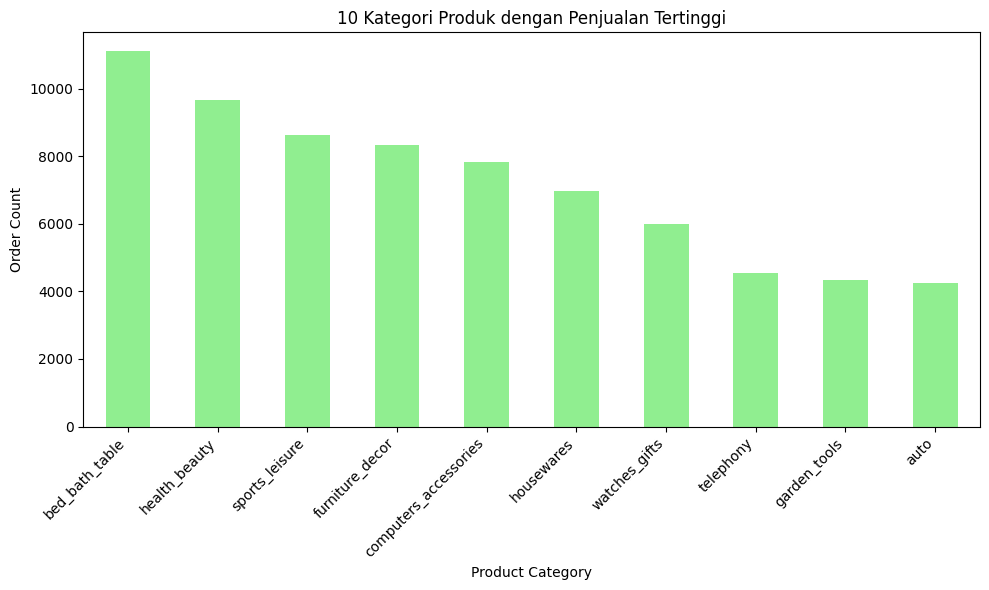

In [73]:
plt.figure(figsize=(10, 6))
max_order.plot(kind='bar', color='lightgreen')
plt.title('10 Kategori Produk dengan Penjualan Tertinggi')
plt.xlabel('Product Category')
plt.ylabel('Order Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

### 10122096

#### Pertanyaan 1
Apakah Lama Pengiriman berpengaruh terhadap review score?

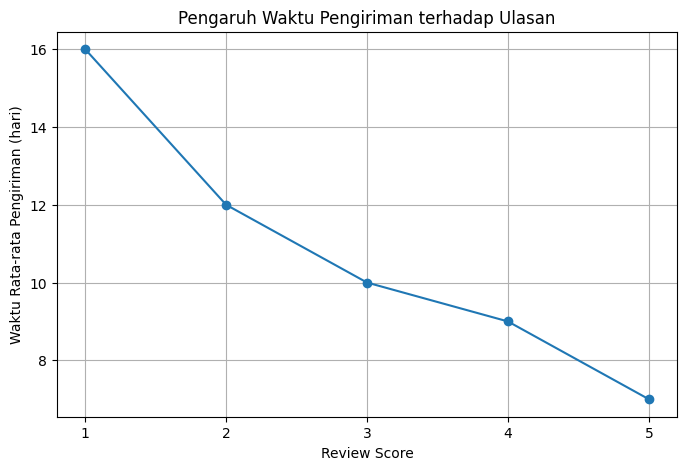

In [74]:
merge_reviews_deliver_order                  = pd.merge(delivered_orders[delivered_orders["order_status"] != "canceled"], order_reviews, on='order_id', how='inner')
merge_reviews_deliver_order['delivery_time'] = merge_reviews_deliver_order['order_delivered_customer_date'] - merge_reviews_deliver_order['order_delivered_carrier_date']
avg_delivery_time_per_score                  = merge_reviews_deliver_order.groupby('review_score')['delivery_time'].mean()

del merge_reviews_deliver_order

#Visualisasi
plt.figure(figsize=(8, 5))
plt.plot(avg_delivery_time_per_score.index, avg_delivery_time_per_score.dt.days, marker='o', linestyle='-')
plt.title('Pengaruh Waktu Pengiriman terhadap Ulasan')
plt.xlabel('Review Score')
plt.ylabel('Waktu Rata-rata Pengiriman (hari)')
plt.xticks(avg_delivery_time_per_score.index)
plt.grid(True)
plt.show()

#### Pertanyaan 2
Apakah highlight yang membuat customer memberikan review score yang kecil?

review_score  review_comment_title
1             Bom                      5
              Não recebi              13
              Não recebi o produto    30
              Não recomendo           44
              Produto com defeito     22
              Produto errado          30
              Produto não entregue    26
              Péssimo                 15
              Péssimo                 16
              Regular                  7
              Ruim                    37
              bom                      2
              não recomendo           34
              recomendo                2
2             Bom                      8
              Não recebi               1
              Não recebi o produto     3
              Não recomendo            7
              Produto com defeito      7
              Produto errado           5
              Produto não entregue     3
              Regular                  6
              Ruim                     8
              bom     

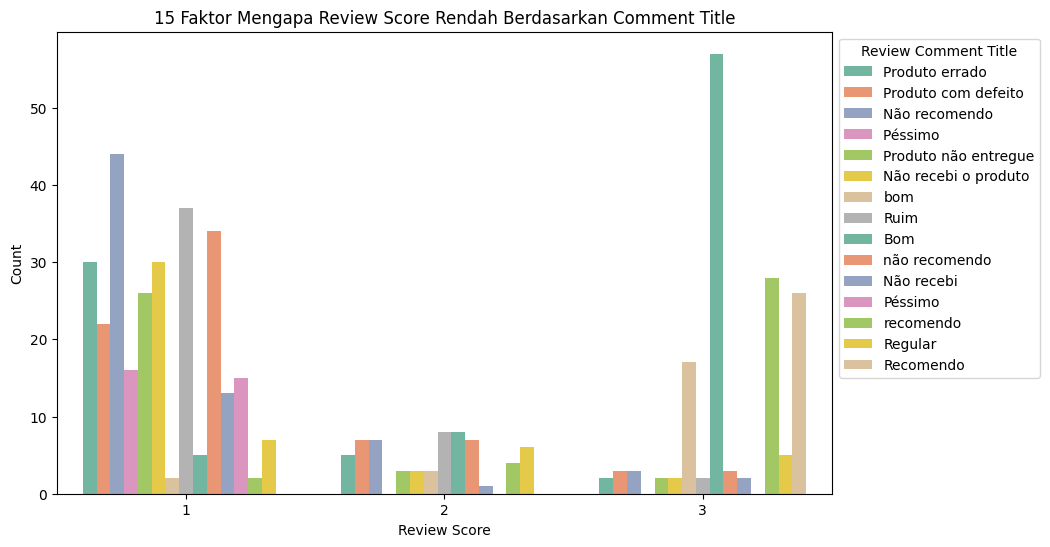

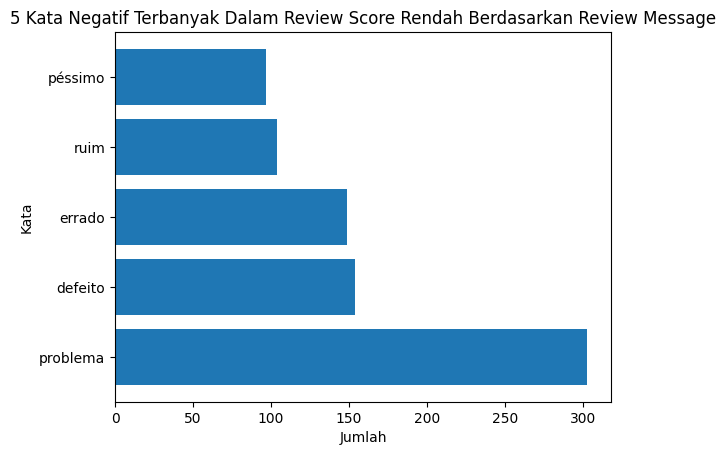

In [75]:
order_reviews_message = pd.read_csv("./E-Commerce Public Dataset/order_reviews_dataset.csv")
low_scores            = order_reviews_message[order_reviews_message['review_score'] <= 3]
top_15_comment_titles = low_scores['review_comment_title'].value_counts().nlargest(15).index
top_15_reasons        = low_scores[low_scores['review_comment_title'].isin(top_15_comment_titles)]
negative_words_pt     = ['ruim', 'lento', 'danificado', 'decepcionado', 'decepcionante', 'problema', 'chato', 'péssimo', 'horroroso', 'terrível', 'frustrante', 'errado', 'defeito']
low_scores_len        = low_scores[low_scores['review_comment_message'].str.len() >= 4]
negative_phrases_pt   = low_scores_len['review_comment_message'].apply(lambda x: [word.lower() for word in x.split() if word.lower() in negative_words_pt])
negative_phrases_pt   = [phrase for sublist in negative_phrases_pt for phrase in sublist]
negative_freq_pt      = Counter(negative_phrases_pt)
common_negative_pt    = negative_freq_pt.most_common(5)
common_negative_df_pt = pd.DataFrame(common_negative_pt, columns=['Kata', 'Jumlah'])
top_15_reasons_df = top_15_reasons.groupby(['review_score', 'review_comment_title']).size()
display(top_15_reasons_df.iloc[:])

del order_reviews_message, low_scores, top_15_comment_titles, negative_words_pt, low_scores_len, negative_phrases_pt, negative_freq_pt, common_negative_pt

plt.figure(figsize=(10, 6))
sea.countplot(x='review_score', hue='review_comment_title', data=top_15_reasons, palette='Set2')
plt.title('15 Faktor Mengapa Review Score Rendah Berdasarkan Comment Title')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.legend(title='Review Comment Title', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

plt.barh(common_negative_df_pt['Kata'], common_negative_df_pt['Jumlah'])
plt.xlabel('Jumlah')
plt.ylabel('Kata')
plt.title('5 Kata Negatif Terbanyak Dalam Review Score Rendah Berdasarkan Review Message')
plt.show()

#### Pertanyaan 3
Apakah kesamaan negara asal antara seller dan customer berpengaruh terhadap jumlah pembelian?

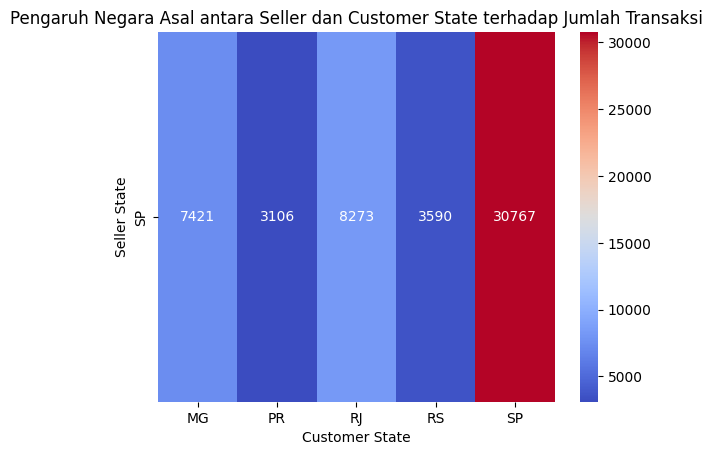

In [76]:
orders_concat         = pd.concat([delivered_orders[delivered_orders["order_status"] != "canceled"], shipped_orders[shipped_orders['order_status'] != 'canceled']], ignore_index=True)
orders_concat         = pd.concat([orders_concat, approved_orders[approved_orders["order_status"] != "canceled"]], ignore_index=True)
merge_order_for_state = pd.merge(orders_concat, order_items, on='order_id', how='inner')
merge_order_for_state.drop_duplicates(["order_id"], keep = "last", inplace = True, ignore_index = True)
transaction_count     = merge_order_for_state.groupby(['seller_state', 'customer_state']).size().reset_index(name='transaction_count')
top_5_transactions    = transaction_count.nlargest(5, 'transaction_count')
heatmap_data          = top_5_transactions.pivot_table(index='seller_state', columns='customer_state', values='transaction_count')

del orders_concat, merge_order_for_state, transaction_count, top_5_transactions

sea.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='g')
plt.title('Pengaruh Negara Asal antara Seller dan Customer State terhadap Jumlah Transaksi')
plt.xlabel('Customer State')
plt.ylabel('Seller State')
plt.show()

#### Pertanyaan 4
Berapakah rata-rata jauh pengiriman yang sudah diterima berdasarkan seller state?

In [77]:
def hitung_jarak(row):
    customer_coords = (row['geolocation_lat_x'], row['geolocation_lng_x'])
    seller_coords = (row['geolocation_lat_y'], row['geolocation_lng_y'])
    return geodesic(customer_coords, seller_coords).kilometers

In [78]:
orders_geo = pd.merge(delivered_orders[delivered_orders["order_status"] != "canceled"], geolocation, 
                      left_on='customer_zip_code_prefix', 
                      right_on='geolocation_zip_code_prefix',
                      how="inner")

In [79]:
orders_geo['delivery_time'] = orders_geo['order_delivered_customer_date'] - orders_geo['order_delivered_carrier_date']
orders_geo['delivery_time'] = orders_geo['delivery_time'].dt.days

In [80]:
orders_geo.drop_duplicates(["order_id"], keep = "last", inplace = True, ignore_index = True)
orders_geo = orders_geo.drop(columns=['geolocation_zip_code_prefix','geolocation_city','geolocation_state','customer_city','order_status',
                                      'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                                      'order_estimated_delivery_date'])
display(orders_geo.head())

,order_id,customer_zip_code_prefix,customer_state,geolocation_lat,geolocation_lng,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,3149,SP,-23.583452,-46.586284,6
1,70b35acffdf851e782ebf6fbc35eb620,3149,SP,-23.583452,-46.586284,1
2,69923a4e07ce446644394df37a710286,3149,SP,-23.583452,-46.586284,0
3,53cdb2fc8bc7dce0b6741e2150273451,47813,BA,-12.124719,-45.011148,12
4,d95ca1fcb72812383e41e2eb7ca65dc2,47813,BA,-12.124719,-45.011148,17


In [81]:
order_items_geo = pd.merge(order_items[['order_id', 'seller_zip_code_prefix', 'seller_state']], geolocation, left_on="seller_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="inner")

In [82]:
order_items_geo.drop_duplicates(["order_id"], keep = "last", inplace = True, ignore_index = True)
order_items_geo = order_items_geo.drop(columns=['geolocation_zip_code_prefix','geolocation_city','geolocation_state' ])
display(order_items_geo.head())

,order_id,seller_zip_code_prefix,seller_state,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,27277,SP,-22.499325,-44.125997
1,0188777fe321843a18be24a6e9aa1e53,27277,SP,-22.499325,-44.125997
2,0191bbb5166d4b9a68df11797d5acfa9,27277,SP,-22.499325,-44.125997
3,03054d8a8eefc2981cfad06f58e27979,27277,SP,-22.499325,-44.125997
4,0c325ea6925de749e1420be0cf43587c,27277,SP,-22.499325,-44.125997


In [83]:
merge_orders_df = pd.merge(orders_geo, order_items_geo, on="order_id", how="inner")
merge_orders_df['distance_KM'] = merge_orders_df.apply(hitung_jarak, axis=1)
display(merge_orders_df)

,order_id,customer_zip_code_prefix,customer_state,geolocation_lat_x,geolocation_lng_x,delivery_time,seller_zip_code_prefix,seller_state,geolocation_lat_y,geolocation_lng_y,distance_KM
0,e481f51cbdc54678b7cc49136f2d6af7,3149,SP,-23.583452,-46.586284,6,9350,SP,-23.675542,-46.442547,17.864603
1,70b35acffdf851e782ebf6fbc35eb620,3149,SP,-23.583452,-46.586284,1,13405,SP,-22.714922,-47.655772,145.764547
2,69923a4e07ce446644394df37a710286,3149,SP,-23.583452,-46.586284,0,7025,SP,-23.481646,-46.545616,12.015637
3,53cdb2fc8bc7dce0b6741e2150273451,47813,BA,-12.124719,-45.011148,12,31570,SP,-19.813375,-43.984022,857.887451
4,d95ca1fcb72812383e41e2eb7ca65dc2,47813,BA,-12.124719,-45.011148,17,4782,SP,-23.686924,-46.703613,1292.181449
...,...,...,...,...,...,...,...,...,...,...,...
94629,87334ea6311529ce3e36b18350d2d4b3,25932,RJ,-22.607969,-43.172120,7,4782,SP,-23.686924,-46.703613,380.875020
94630,5bd233924f0b9c52492bd5a92e5ab2d3,77829,TO,-7.224079,-48.235156,10,2992,SP,-23.451797,-46.728534,1802.946621
94631,cfa78b997e329a5295b4ee6972c02979,83870,PR,-25.986294,-49.684537,36,89251,SC,-26.492193,-49.072208,82.972941
94632,880675dff2150932f1601e1c07eadeeb,5127,SP,-23.498058,-46.736848,5,14940,SP,-21.754867,-48.838906,289.750903


C:\Users\Acer\AppData\Local\Temp\ipykernel_18836\3153166495.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(data=rata_rata_jarak2, x='seller_state', y='distance_KM', palette='viridis')


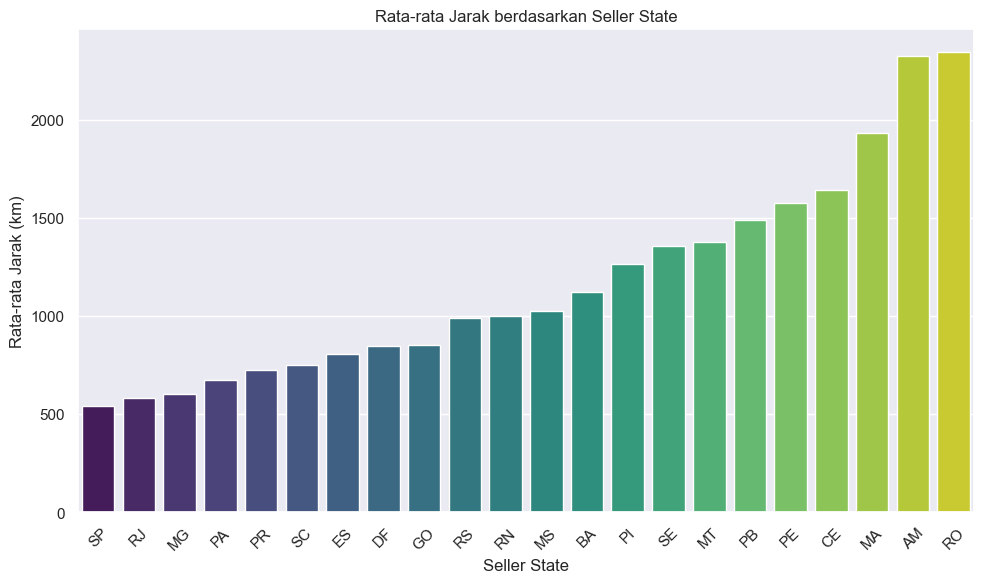

In [84]:
rata_rata_jarak2 = merge_orders_df.groupby('seller_state')['distance_KM'].mean().reset_index()
rata_rata_jarak2 = rata_rata_jarak2.sort_values(ascending=True, by='distance_KM', ignore_index=True)

sea.set_theme()

plt.figure(figsize=(10, 6))
sea.barplot(data=rata_rata_jarak2, x='seller_state', y='distance_KM', palette='viridis')
plt.xlabel('Seller State')
plt.ylabel('Rata-rata Jarak (km)')
plt.title('Rata-rata Jarak berdasarkan Seller State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 5
Apakah jauh pengiriman berdampak pada waktu pengiriman dan review score?

In [85]:
reviewsSort = order_reviews[["order_id", "review_score", "review_answer_timestamp"]].sort_values(["order_id", "review_answer_timestamp"])
reviewsSort.drop_duplicates(["order_id"], keep = "last", inplace = True, ignore_index = True)
display(reviewsSort.head())

,order_id,review_score,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,5,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,4,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,5,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,4,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,5,2017-03-03 10:54:59


In [86]:
orders_review_df = pd.merge(merge_orders_df[['order_id', 'distance_KM','delivery_time']], reviewsSort, on="order_id", how="inner")
display(orders_review_df)

,order_id,distance_KM,delivery_time,review_score,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,17.864603,6,4,2017-10-12 03:43:48
1,70b35acffdf851e782ebf6fbc35eb620,145.764547,1,5,2018-03-27 02:21:27
2,69923a4e07ce446644394df37a710286,12.015637,0,5,2017-09-07 00:44:35
3,53cdb2fc8bc7dce0b6741e2150273451,857.887451,12,4,2018-08-08 18:37:50
4,d95ca1fcb72812383e41e2eb7ca65dc2,1292.181449,17,2,2017-04-22 09:51:23
...,...,...,...,...,...
93992,87334ea6311529ce3e36b18350d2d4b3,380.875020,7,5,2018-02-02 01:37:30
93993,5bd233924f0b9c52492bd5a92e5ab2d3,1802.946621,10,5,2018-06-16 04:13:03
93994,cfa78b997e329a5295b4ee6972c02979,82.972941,36,1,2018-01-21 02:51:39
93995,880675dff2150932f1601e1c07eadeeb,289.750903,5,5,2017-03-11 15:42:41


In [87]:
orders_review_df.drop(["order_id", "review_answer_timestamp"], axis = 1, inplace = True)

#Filter waktu pengiriman dengan data <= 15 karena sangat banyak
orders_review_filtered = orders_review_df[(orders_review_df['delivery_time'] <= 15) & (orders_review_df['delivery_time'] > 0)]
orders_review_filtered = orders_review_filtered.drop(columns='review_score')
display(orders_review_df.head())
display(orders_review_filtered.head())

,distance_KM,delivery_time,review_score
0,17.864603,6,4
1,145.764547,1,5
2,12.015637,0,5
3,857.887451,12,4
4,1292.181449,17,2


,distance_KM,delivery_time
0,17.864603,6
1,145.764547,1
3,857.887451,12
5,512.396168,9
6,859.521505,10


,distance_KM,delivery_time,review_score
distance_KM,1.000000,0.614977,-0.065554
delivery_time,0.614977,1.000000,-0.195204
review_score,-0.065554,-0.195204,1.000000


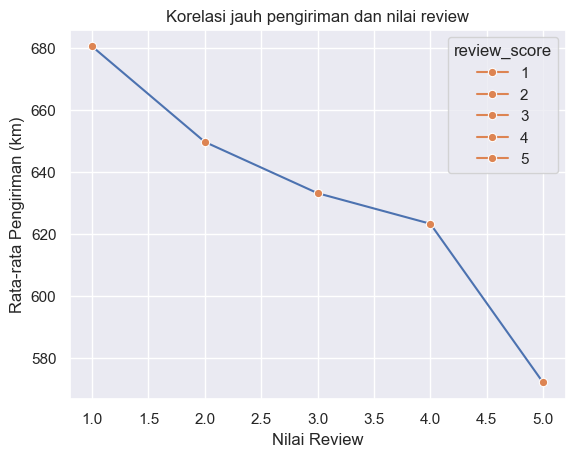

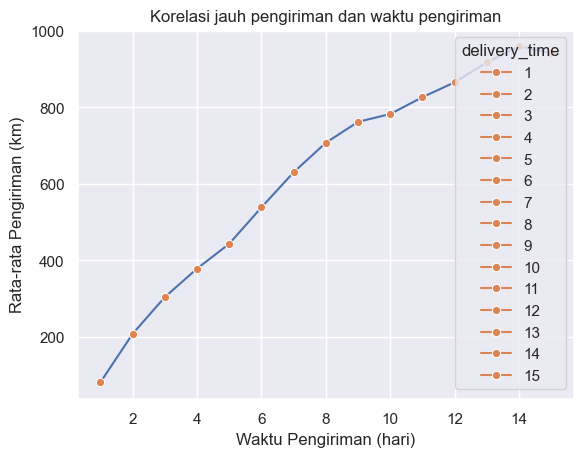

In [88]:
display(orders_review_df.corr("spearman"))

review_distance_df   = orders_review_df.groupby("review_score")["distance_KM"].mean()
mean_distance_deliver_time_df = orders_review_filtered.groupby("delivery_time")["distance_KM"].mean()

del orders_geo, order_items_geo, merge_orders_df, reviewsSort, orders_review_filtered

sea.lineplot(x = review_distance_df.keys(), y = review_distance_df.values)
sea.lineplot(x = review_distance_df.keys(), y = review_distance_df.values, style = review_distance_df.keys(), 
             markers =["o", "o", "o", "o", "o"], 
             dashes = False)
plt.title("Korelasi jauh pengiriman dan nilai review")
plt.xlabel("Nilai Review")
plt.ylabel("Rata-rata Pengiriman (km)")
plt.show()

sea.lineplot(x = mean_distance_deliver_time_df.keys(), y = mean_distance_deliver_time_df.values)
sea.lineplot(x = mean_distance_deliver_time_df.keys(), y = mean_distance_deliver_time_df.values, 
             style = mean_distance_deliver_time_df.keys(), 
             markers =["o", "o", "o", "o", "o", "o","o","o","o","o","o","o","o","o","o",], 
             dashes = False)
plt.title("Korelasi jauh pengiriman dan waktu pengiriman")
plt.xlabel("Waktu Pengiriman (hari)")
plt.ylabel("Rata-rata Pengiriman (km)")
plt.show()

### 10122104

#### Pertanyaan 1
Apakah barang yang datang ke costumer melebihi tanggal estimasinya dapat mempengaruhi pembatalan pesanan?

##### PART 1

Menelusuri Pesanan yang dibatalkan 

In [89]:
batal               = (delivered_orders[delivered_orders["order_status"] == "canceled"])
batal['is_delayed'] = batal['order_delivered_customer_date'] > batal['order_estimated_delivery_date']
display(batal[['order_id','order_status','order_delivered_customer_date', 'order_estimated_delivery_date', 'is_delayed']])

,order_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,is_delayed
96455,1950d777989f6a877539f53795b4c3c3,canceled,2018-03-21 22:03:51,2018-03-09,True
96456,dabf2b0e35b423f94618bf965fcb7514,canceled,2016-10-16 14:36:59,2016-11-30,False
96457,770d331c84e5b214bd9dc70a10b829d0,canceled,2016-10-14 15:07:11,2016-11-29,False
96458,8beb59392e21af5eb9547ae1a9938d06,canceled,2016-10-19 18:47:43,2016-11-30,False
96459,65d1e226dfaeb8cdc42f665422522d14,canceled,2016-11-08 10:58:34,2016-11-25,False
96460,2c45c33d2f9cb8ff8b1c86cc28c11c30,canceled,2016-11-09 14:53:50,2016-12-08,False


Menampilkan Data Yang Datang Terlambat Dan Sampai Tepat Waktu

In [90]:
display(batal[~batal["is_delayed"]])
display(batal[batal["is_delayed"]])

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,is_delayed
96456,dabf2b0e35b423f94618bf965fcb7514,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30,5846,sao paulo,SP,False
96457,770d331c84e5b214bd9dc70a10b829d0,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29,20091,rio de janeiro,RJ,False
96458,8beb59392e21af5eb9547ae1a9938d06,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30,20091,rio de janeiro,RJ,False
96459,65d1e226dfaeb8cdc42f665422522d14,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25,22770,rio de janeiro,RJ,False
96460,2c45c33d2f9cb8ff8b1c86cc28c11c30,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08,88058,florianopolis,SC,False


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,is_delayed
96455,1950d777989f6a877539f53795b4c3c3,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09,32071,contagem,MG,True


Menampilkan Grafik

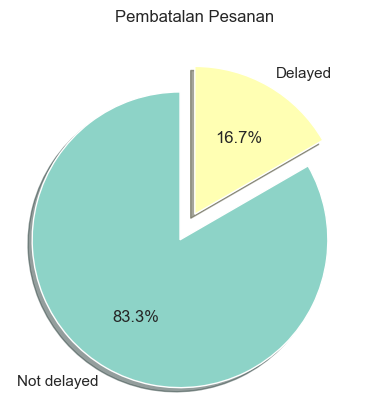

In [91]:
grup1 = batal.groupby('is_delayed').size()

del batal

labels    = ['Not delayed', 'Delayed']
myexplode = [0.2,0]
colors    = sea.color_palette('Set3')

plt.pie(grup1, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, explode=myexplode)
plt.title('Pembatalan Pesanan')
plt.show()

##### PART 2

Mencari Pesanan Yang Datang Melebihi Tanggal Estimasi

In [92]:
batal               = delivered_orders
batal["is_delayed"] = batal['order_delivered_customer_date'] > batal['order_estimated_delivery_date']
batal               = batal[batal["is_delayed"]]
display(batal.head())

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,is_delayed
19,203096f03d82e0dffbc41ebc2e2bcfb7,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,4001,sao paulo,SP,True
24,fbf9ac61453ac646ce8ad9783d7d0af6,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,21715,rio de janeiro,RJ,True
34,8563039e855156e48fccee4d611a3196,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,77480,alvorada,TO,True
40,6ea2f835b4556291ffdc53fa0b3b95e8,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,19400,presidente venceslau,SP,True
55,66e4624ae69e7dc89bd50222b59f581f,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,49030,aracaju,SE,True


Menampilkan Pesanan Yang Datang Melebihi Tanggal Estimasi

In [93]:
display(batal[batal["order_status"] == 'canceled'])
display(batal[batal["order_status"] == 'delivered'].head())

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,is_delayed
96455,1950d777989f6a877539f53795b4c3c3,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09,32071,contagem,MG,True


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,is_delayed
19,203096f03d82e0dffbc41ebc2e2bcfb7,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,4001,sao paulo,SP,True
24,fbf9ac61453ac646ce8ad9783d7d0af6,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,21715,rio de janeiro,RJ,True
34,8563039e855156e48fccee4d611a3196,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,77480,alvorada,TO,True
40,6ea2f835b4556291ffdc53fa0b3b95e8,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,19400,presidente venceslau,SP,True
55,66e4624ae69e7dc89bd50222b59f581f,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,49030,aracaju,SE,True


Menampilkan Grafik

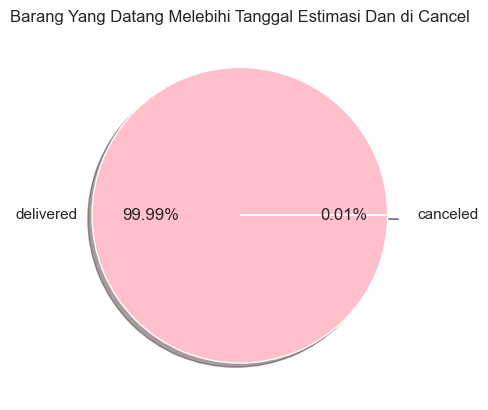

In [94]:
grup2 = batal.groupby('order_status').size()

del batal

labels    = ['canceled', 'delivered']
myexplode = [0.10,0]
colors    = ['blue','pink']

plt.pie(grup2, labels=labels, colors=colors, autopct='%1.2f%%',  shadow=True, explode=myexplode)
plt.title('Barang Yang Datang Melebihi Tanggal Estimasi Dan di Cancel')
plt.show()

#### Pertanyaan 2
Kategori barang apa yang paling banyak dibeli?

Menghitung jumlah pesanan setiap masing-masing kategori

In [95]:
categories_count = order_items["product_category_name"].value_counts()
display(categories_count.head())

product_category_name
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
Name: count, dtype: int64

Membuat Grafik Kategori Produk Yang Paling Banyak Dipesan

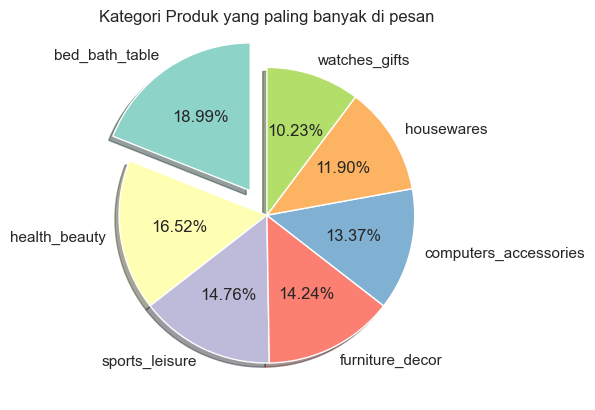

In [96]:
myexplode = [0.2 ,0 ,0 ,0 ,0 ,0 ,0]
plt.pie(categories_count.head(7).values, labels = categories_count.head(7).keys(), explode=myexplode, shadow=True, colors=sea.color_palette('Set3'), autopct='%1.2f%%', startangle=90)
plt.title(label="Kategori Produk yang paling banyak di pesan")
plt.show()

### 10122105

#### Pertanyaan 1
Apa 10 kategori produk dengan penjualan terendah?

In [97]:
categories_count_min_order = order_items["product_category_name"].value_counts(ascending=True)
min_order                  = categories_count_min_order.head(10)
del categories_count_min_order
display(min_order)

product_category_name
security_and_services                 2
fashion_childrens_clothes             8
la_cuisine                           14
cds_dvds_musicals                    14
arts_and_craftmanship                24
fashion_sport                        30
home_comfort_2                       30
flowers                              33
furniture_mattress_and_upholstery    38
music                                38
Name: count, dtype: int64

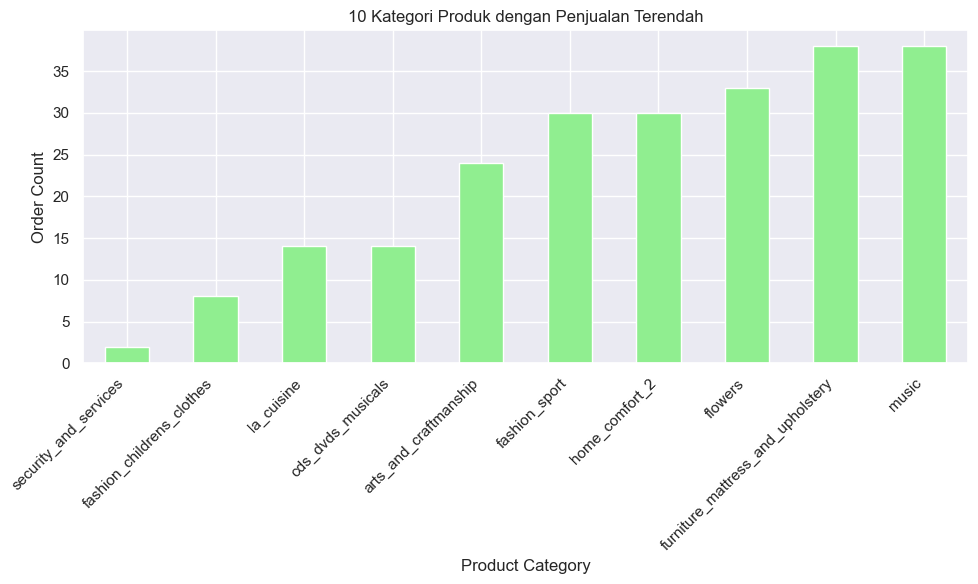

In [98]:
plt.figure(figsize=(10, 6))
min_order.plot(kind='bar', color='lightgreen')
plt.title('10 Kategori Produk dengan Penjualan Terendah')
plt.xlabel('Product Category')
plt.ylabel('Order Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

### 10122114

#### Pertanyaan 1
Berapa kemungkinan harga pengiriman suatu barang yang memiliki berat, panjang, tinggi, dan lebar rata-rata dari seluruh data barang yang sudah ada?

Untuk memprediksi harga pengiriman dari suatu barang dengan berat, panjang, tinggi, dan lebar rata-rata data barang yang sudah ada, algoritma pembelajaran mesin perlu diaplikasikan. Pertama-tama, data harga pengiriman, berat, panjang, tinggi, dan lebar barang perlu diambil terlebih dahulu, di mana data-data tersebut merupakan beberapa fitur dari tabel order_items.

In [99]:
itemsDf = order_items[["order_id", "freight_value", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]]

display(itemsDf.head())

,order_id,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,19.93,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,17.87,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,12.79,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,3750.0,35.0,40.0,30.0


Seperti diketahui pada EDA, pada tabel order_items, ada beberapa order_id yang memiliki duplikat dikarenakan pada satu order (order_id), ada kemungkinan seseorang membeli beberapa item (order_item_id) dari satu kategori yang sama.

In [100]:
print("Total data          :", len(itemsDf))
print("order_id duplicates :", len(itemsDf[itemsDf.duplicated(["order_id"], False)]["order_id"].unique()))
print("Total duplicates    :", len(itemsDf[itemsDf.duplicated(["order_id"], False)]))

Total data          : 111022
order_id duplicates : 9652
Total duplicates    : 23419


Setelah tabel tersebut ditelusuri, terdapat 23.419 dari 111.022 data yang merupakan data duplikat, di mana terdapat 9.652 order_id yang memiliki duplikat.

In [101]:
display(itemsDf[itemsDf.duplicated(["order_id"], False)].head())

,order_id,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm
13,0008288aa423d2a3f00fcb17cd7d8719,13.37,1650.0,30.0,22.0,30.0
14,0008288aa423d2a3f00fcb17cd7d8719,13.37,1650.0,30.0,22.0,30.0
32,00143d0f86d6fbd9f9b38ab440ac16f5,15.10,180.0,17.0,11.0,14.0
33,00143d0f86d6fbd9f9b38ab440ac16f5,15.10,180.0,17.0,11.0,14.0
34,00143d0f86d6fbd9f9b38ab440ac16f5,15.10,180.0,17.0,11.0,14.0


Apabila diperhatikan pada data-data duplikat, dapat diketahui bahwa pada setiap order_id duplikat, data harga pengiriman, berat, panjang, tinggi, dan lebar barang memiliki nilai yang sama. Oleh sebab itu, data yang memiliki order_id duplikat dapat dihapus terlebih dahulu duplikatnya untuk menghindari anomali dalam proses pembelajaran mesin.

In [102]:
itemsDf.drop_duplicates(subset = ["order_id"], keep = "first", inplace = True, ignore_index = True)
print("Total data after duplicates removal :", len(itemsDf))
print("Is the data unique                  :", itemsDf["order_id"].is_unique)

Total data after duplicates removal : 97255
Is the data unique                  : True


Setelah data duplikat dihapus, dapat dilihat bahwa terdapat 97.255 data yang unik. Dikarenakan fitur order_id sudah tidak akan digunakan lagi dalam proses-proses berikutnya, maka fitur tersebut akan dihapus. Setelah fitur order_id dihapus, agar korelasi antar data lebih baik, maka akan dibuat sebuah fitur baru, yakni volume dari sebuah produk (product_volume_cm), yang didapat dari perkalian antara product_length_cm, product_height_cm, dan product_width_cm. Ketiga fitur tersebut lalu dapat dihapus.

In [103]:
itemsDf.drop(["order_id"], axis = 1, inplace = True)
itemsDf.insert(2, "product_volume_cm", (itemsDf["product_length_cm"] * itemsDf["product_height_cm"] * itemsDf["product_width_cm"]))
itemsDf.drop(["product_length_cm", "product_height_cm", "product_width_cm"], axis = 1, inplace = True)
display(itemsDf.head())


,freight_value,product_weight_g,product_volume_cm
0,13.29,650.0,3528.0
1,19.93,30000.0,60000.0
2,17.87,3050.0,14157.0
3,12.79,200.0,2400.0
4,18.14,3750.0,42000.0


Setelah seluruh data dari tabel order_items yang dibutuhkan dirasa sudah cukup baik untuk dilanjutkan ke proses selanjutnya, maka selanjutnya untuk mengetahui pengaruh/korelasi antara setiap fitur input (product_weight_g dan product_volume_cm) dengan fitur output (freight_value), akan dicari koefisien korelasi antar setiap fitur tersebut.

,freight_value,product_weight_g,product_volume_cm
freight_value,1.000000,0.615757,0.591135
product_weight_g,0.615757,1.000000,0.799811
product_volume_cm,0.591135,0.799811,1.000000


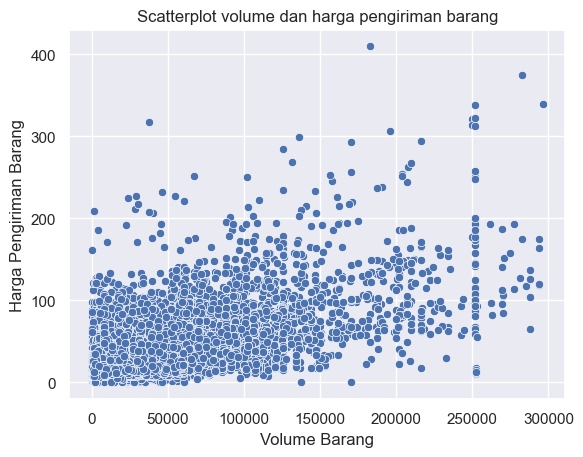

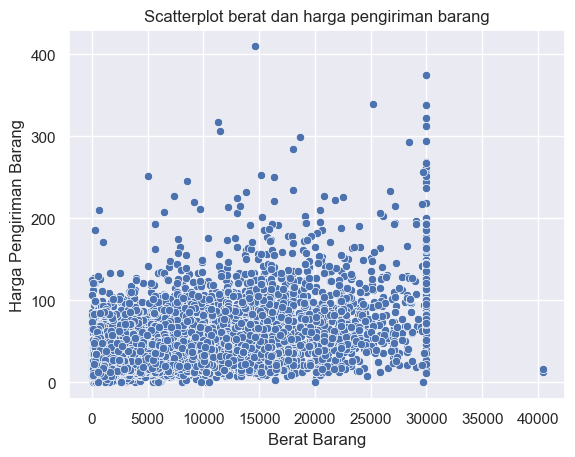

In [104]:
display(itemsDf.corr("pearson"))

sea.scatterplot(x = itemsDf["product_volume_cm"], y = itemsDf["freight_value"])
plt.title("Scatterplot volume dan harga pengiriman barang")
plt.xlabel("Volume Barang")
plt.ylabel("Harga Pengiriman Barang")
plt.show()

sea.scatterplot(x = itemsDf["product_weight_g"], y = itemsDf["freight_value"])
plt.title("Scatterplot berat dan harga pengiriman barang")
plt.xlabel("Berat Barang")
plt.ylabel("Harga Pengiriman Barang")
plt.show()

Apabila diperhatikan, dapat diketahui bahwa korelasi antara berat dan volume barang dengan harga pengiriman barang cukup tinggi (0.615757 dan 0.591135). Akan tetapi, dapat dilihat pada grafik scatterplot bahwa dari data-data tersebut, terdapat banyak outlier. Oleh sebab itu, algoritma pembelajaran mesin yang akan dipakai ialah algoritma Regresi Kuantil agar outlier-outlier tersebut dapat terjangkau oleh model regresi.

In [105]:
#Proceed with cautions this code box will run in estimated time of 7 mins.
quantile_regressor = QuantileRegressor(solver = "highs")
quantile_regressor.fit(itemsDf[["product_weight_g", "product_volume_cm"]].values, itemsDf["freight_value"])

QuantileRegressor(solver='highs')

Proses Regresi Kuantil tersebut akan menghasilkan suatu model yang akan dipakai untuk memprediksi harga pengiriman barang berdasarkan berat dan volume barang. Setelah itu, akan dicari rata-rata dari berat, panjang, tinggi, dan lebar dari seluruh data barang. Di mana rata-rata panjang, tinggi, dan lebar akan dihitung menjadi rata-rata volume.

In [106]:
print("Rata-rata berat barang  :", itemsDf["product_weight_g"].mean())
print("Rata-rata volume barang :", itemsDf["product_volume_cm"].mean())

Rata-rata berat barang  : 2108.657148732713
Rata-rata volume barang : 15273.488057169297


Dengan rata-rata berat barang ~2108.65715 dan rata-rata volume barang ~15273.48806, hal terakhir yang perlu dilakukan ialah untuk memasukan kedua data input tersebut ke dalam model yang telah didapat dari algoritma pembelajaran mesin sebelumnya untuk mengetahui perkiraan harga pengiriman barang.

In [107]:
means = [[itemsDf["product_weight_g"].mean(), itemsDf["product_volume_cm"].mean()]]

print("Perkiraan harga pengiriman barang :", quantile_regressor.predict(means))

Perkiraan harga pengiriman barang : [18.40853503]


#### Pertanyaan 2
Antara harga barang dan harga pengiriman, fitur mana yang lebih memengaruhi rating dari pembeli?

Dikarenakan fitur harga barang dan harga pengiriman barang terdapat pada tabel order_items, dan fitur rating dari pembeli terdapat pada tabel order_reviews. Maka, kedua tabel tersebut akan diambil dan dimasukkan ke dua variabel baru, yakni itemsDf2 dan reviewsDf. Pada tabel order_reviews, data diurutkan berdasarkan reviews_id, dikarenakan fitur yang akan dilihat ialah fitur order_id, maka tabel reviewsDf akan diurutkan berdasarkan order_id yang lalu diurutkan berdasarkan review_answer_timestamp.

In [108]:
itemsDf2  = order_items[["order_id", "price", "freight_value"]]
reviewsDf = order_reviews[["order_id", "review_score", "review_answer_timestamp"]].sort_values(["order_id", "review_answer_timestamp"])

display(itemsDf2.head())
display(reviewsDf.head())

,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14


,order_id,review_score,review_answer_timestamp
51963,00010242fe8c5a6d1ba2dd792cb16214,5,2017-09-22 10:57:03
27823,00018f77f2f0320c557190d7a144bdd3,4,2017-05-15 11:34:13
4218,000229ec398224ef6ca0657da4fc703e,5,2018-01-23 16:06:31
38844,00024acbcdf0a6daa1e931b038114c75,4,2018-08-15 16:39:01
55676,00042b26cf59d7ce69dfabb4e55b4fd9,5,2017-03-03 10:54:59


Seperti diketahui pada EDA, pada tabel order_items, ada beberapa order_id yang memiliki duplikat dikarenakan pada satu order (order_id), ada kemungkinan seseorang membeli beberapa item (order_item_id) dari satu kategori yang sama.

In [109]:
display(itemsDf2[itemsDf2["order_id"].duplicated(False)].head())
print("Total data          :", len(itemsDf2))
print("order_id duplicates :", len(itemsDf2[itemsDf2["order_id"].duplicated(False)]["order_id"].unique()))
print("Total duplicates    :", len(itemsDf2[itemsDf2["order_id"].duplicated(False)]))

,order_id,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,49.90,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,49.90,13.37
32,00143d0f86d6fbd9f9b38ab440ac16f5,21.33,15.10
33,00143d0f86d6fbd9f9b38ab440ac16f5,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,21.33,15.10


Total data          : 111022
order_id duplicates : 9652
Total duplicates    : 23419


Begitu pula pada tabel order_reviews, ada beberapa order_id yang memiliki duplikat dikarenakan pada satu order (order_id), ada kemungkinan seseorang memberi reviews beberapa kali.

In [110]:
display(reviewsDf[reviewsDf["order_id"].duplicated(False)].head())
print("Total data          :", len(reviewsDf))
print("order_id duplicates :", len(reviewsDf[reviewsDf["order_id"].duplicated(False)]["order_id"].unique()))
print("Total duplicates    :", len(reviewsDf[reviewsDf["order_id"].duplicated(False)]))

,order_id,review_score,review_answer_timestamp
22423,0035246a40f520710769010f752e7507,5,2017-08-29 21:45:57
25612,0035246a40f520710769010f752e7507,5,2017-08-30 01:59:12
22779,013056cfe49763c6f66bda03396c5ee3,5,2018-02-23 12:12:30
68633,013056cfe49763c6f66bda03396c5ee3,4,2018-03-05 17:02:00
854,0176a6846bcb3b0d3aa3116a9a768597,5,2018-01-02 10:54:06


Total data          : 99224
order_id duplicates : 547
Total duplicates    : 1098


Apabila diperhatikan pada data-data duplikat tabel itemsDf2, dapat diketahui bahwa pada setiap order_id duplikat, data harga dan harga pengiriman barang memiliki nilai yang sama. Oleh sebab itu, data yang memiliki order_id duplikat dapat dihapus terlebih dahulu duplikatnya.

In [111]:
itemsDf2.drop_duplicates(["order_id"], keep = "first", inplace = True, ignore_index = True)
display(itemsDf2.head())
print("Total data after duplicates removal :", len(itemsDf2))
print("Is the data unique                  :", itemsDf2["order_id"].is_unique)

,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14


Total data after duplicates removal : 97255
Is the data unique                  : True


Sedangkan pada tabel reviewsDf, dikarenakan nilai review (review_score) dari setiap order_id dan duplikatnya dapat berbeda, oleh sebab itu data yang memiliki duplikat akan dihapus duplikatnya dan diambil data terakhir sesuai tanggalnya.

In [112]:
reviewsDf.drop_duplicates(["order_id"], keep = "last", inplace = True, ignore_index = True)
display(reviewsDf.head())
print("Total data after duplicates removal :", len(reviewsDf))
print("Is the data unique                  :", reviewsDf["order_id"].is_unique)

,order_id,review_score,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,5,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,4,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,5,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,4,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,5,2017-03-03 10:54:59


Total data after duplicates removal : 98673
Is the data unique                  : True


Setelah semua data duplikat dihapus, data-data pada itemsDf2 akan digabung dengan data pada reviewsDf berdasarkan pada key kedua tabel, yakni order_id.

In [113]:
item_review_df = pd.concat([itemsDf2, reviewsDf], axis = 1, join = "inner")
item_review_df = item_review_df.iloc[:, [i for i, x in enumerate(item_review_df.columns) if i != 3]]

display(item_review_df.head())

,order_id,price,freight_value,review_score,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,5,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,4,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,5,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,4,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,5,2017-03-03 10:54:59


Dikarenakan fitur order_id dan review_answer_timestamp tidak akan dipakai, maka kedua fitur tersebut akan dihapus.

In [114]:
item_review_df.drop(["order_id", "review_answer_timestamp"], axis = 1, inplace = True)
display(item_review_df.head())
del itemsDf2, reviewsDf

,price,freight_value,review_score
0,58.90,13.29,5
1,239.90,19.93,4
2,199.00,17.87,5
3,12.99,12.79,4
4,199.90,18.14,5


Terakhir, nilai korelasi koefisien dari ketiga fitur akan dicari. Setelah itu, akan dibuat dua grafik, yakni grafik antara nilai review dengan harga barang dan nilai review dengan harga pengiriman barang untuk memudahkan analisis korelasi.

,price,freight_value,review_score
price,1.000000,0.440329,-0.000007
freight_value,0.440329,1.000000,0.001911
review_score,-0.000007,0.001911,1.000000


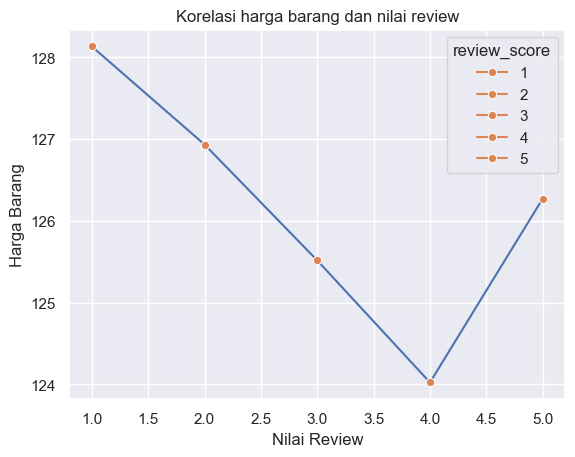

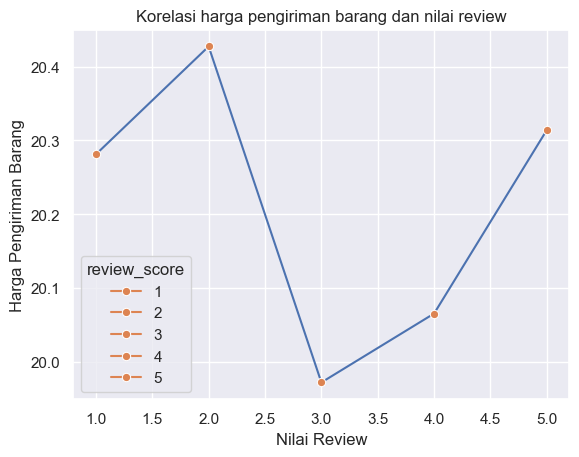

In [115]:
display(item_review_df.corr("spearman"))

price_review_df   = item_review_df.groupby("review_score")["price"].mean()
freight_review_df = item_review_df.groupby("review_score")["freight_value"].mean()

sea.lineplot(x = price_review_df.keys(), y = price_review_df.values)
sea.lineplot(x = price_review_df.keys(), y = price_review_df.values, style = price_review_df.keys(), markers =["o", "o", "o", "o", "o"], dashes = False)
plt.title("Korelasi harga barang dan nilai review")
plt.xlabel("Nilai Review")
plt.ylabel("Harga Barang")
plt.show()

sea.lineplot(x = freight_review_df.keys(), y = freight_review_df.values)
sea.lineplot(x = freight_review_df.keys(), y = freight_review_df.values, style = freight_review_df.keys(), markers =["o", "o", "o", "o", "o"], dashes = False)
plt.title("Korelasi harga pengiriman barang dan nilai review")
plt.xlabel("Nilai Review")
plt.ylabel("Harga Pengiriman Barang")
plt.show()

#### Pertanyaan 3
Bagaimana persebaran kategori barang pada setiap nilai review?

Dikarenakan fitur kategori barang terdapat pada tabel order_items, dan fitur rating dari pembeli terdapat pada tabel order_reviews. Maka, kedua tabel tersebut akan diambil dan dimasukkan ke dua variabel baru, yakni itemsDf3 dan reviewsDf2. Pada tabel order_reviews, data diurutkan berdasarkan reviews_id, dikarenakan fitur yang akan dilihat ialah fitur order_id, maka tabel reviewsDf2 akan diurutkan berdasarkan order_id yang lalu diurutkan berdasarkan review_answer_timestamp.

In [116]:
itemsDf3   = order_items[["order_id", "product_category_name"]]
reviewsDf2 = order_reviews[["order_id", "review_score", "review_answer_timestamp"]].sort_values(["order_id", "review_answer_timestamp"])

display(itemsDf3.head())
display(reviewsDf2.head())

,order_id,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,pet_shop
2,000229ec398224ef6ca0657da4fc703e,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools


,order_id,review_score,review_answer_timestamp
51963,00010242fe8c5a6d1ba2dd792cb16214,5,2017-09-22 10:57:03
27823,00018f77f2f0320c557190d7a144bdd3,4,2017-05-15 11:34:13
4218,000229ec398224ef6ca0657da4fc703e,5,2018-01-23 16:06:31
38844,00024acbcdf0a6daa1e931b038114c75,4,2018-08-15 16:39:01
55676,00042b26cf59d7ce69dfabb4e55b4fd9,5,2017-03-03 10:54:59


Seperti diketahui pada EDA, pada tabel order_items, ada beberapa order_id yang memiliki duplikat dikarenakan pada satu order (order_id), ada kemungkinan seseorang membeli beberapa item (order_item_id) dari satu kategori yang sama.

In [117]:
display(itemsDf3[itemsDf3["order_id"].duplicated(False)].head())
print("Total data          :", len(itemsDf3))
print("order_id duplicates :", len(itemsDf3[itemsDf3["order_id"].duplicated(False)]["order_id"].unique()))
print("Total duplicates    :", len(itemsDf3[itemsDf3["order_id"].duplicated(False)]))

,order_id,product_category_name
13,0008288aa423d2a3f00fcb17cd7d8719,garden_tools
14,0008288aa423d2a3f00fcb17cd7d8719,garden_tools
32,00143d0f86d6fbd9f9b38ab440ac16f5,sports_leisure
33,00143d0f86d6fbd9f9b38ab440ac16f5,sports_leisure
34,00143d0f86d6fbd9f9b38ab440ac16f5,sports_leisure


Total data          : 111022
order_id duplicates : 9652
Total duplicates    : 23419


Begitu pula pada tabel order_reviews, ada beberapa order_id yang memiliki duplikat dikarenakan pada satu order (order_id), ada kemungkinan seseorang memberi reviews beberapa kali.

In [118]:
display(reviewsDf2[reviewsDf2["order_id"].duplicated(False)].head())
print("Total data          :", len(reviewsDf2))
print("order_id duplicates :", len(reviewsDf2[reviewsDf2["order_id"].duplicated(False)]["order_id"].unique()))
print("Total duplicates    :", len(reviewsDf2[reviewsDf2["order_id"].duplicated(False)]))

,order_id,review_score,review_answer_timestamp
22423,0035246a40f520710769010f752e7507,5,2017-08-29 21:45:57
25612,0035246a40f520710769010f752e7507,5,2017-08-30 01:59:12
22779,013056cfe49763c6f66bda03396c5ee3,5,2018-02-23 12:12:30
68633,013056cfe49763c6f66bda03396c5ee3,4,2018-03-05 17:02:00
854,0176a6846bcb3b0d3aa3116a9a768597,5,2018-01-02 10:54:06


Total data          : 99224
order_id duplicates : 547
Total duplicates    : 1098


Apabila diperhatikan pada data-data duplikat tabel itemsDf3, dapat diketahui bahwa pada setiap order_id duplikat, data kategori barang memiliki nilai yang sama. Oleh sebab itu, data yang memiliki order_id duplikat dapat dihapus terlebih dahulu duplikatnya.

In [119]:
itemsDf3.drop_duplicates(["order_id"], keep = "first", inplace = True, ignore_index = True)
display(itemsDf3.head())
print("Total data after duplicates removal :", len(itemsDf3))
print("Is the data unique                  :", itemsDf3["order_id"].is_unique)

,order_id,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,pet_shop
2,000229ec398224ef6ca0657da4fc703e,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools


Total data after duplicates removal : 97255
Is the data unique                  : True


Sedangkan pada tabel reviewsDf2, dikarenakan nilai review (review_score) dari setiap order_id dan duplikatnya dapat berbeda, oleh sebab itu data yang memiliki duplikat akan dihapus duplikatnya dan diambil data terakhir sesuai tanggalnya.

In [120]:
reviewsDf2.drop_duplicates(["order_id"], keep = "last", inplace = True, ignore_index = True)
display(reviewsDf2.head())
print("Total data after duplicates removal :", len(reviewsDf2))
print("Is the data unique                  :", reviewsDf2["order_id"].is_unique)

,order_id,review_score,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,5,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,4,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,5,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,4,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,5,2017-03-03 10:54:59


Total data after duplicates removal : 98673
Is the data unique                  : True


Setelah semua data duplikat dihapus, data-data pada itemsDf3 akan digabung dengan data pada reviewsDf2 berdasarkan pada key kedua tabel, yakni order_id.

In [121]:
item_review_df2 = pd.concat([itemsDf3, reviewsDf2], axis = 1, join = "inner")
item_review_df2 = item_review_df2.iloc[:, [i for i, x in enumerate(item_review_df2.columns) if i != 2]]

display(item_review_df2.head())

,order_id,product_category_name,review_score,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,5,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,4,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,furniture_decor,5,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,perfumery,4,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools,5,2017-03-03 10:54:59


Dikarenakan fitur order_id dan review_answer_timestamp tidak akan dipakai, maka kedua fitur tersebut akan dihapus. Dataframe ini lalu akan diurutkan dari nilai review terbesar ke nilai review terkecil.

In [122]:
item_review_df2.drop(["order_id", "review_answer_timestamp"], axis = 1, inplace = True)
item_review_df2.sort_values(["review_score"], ascending = False, inplace = True)
display(item_review_df2.head())

,product_category_name,review_score
0,cool_stuff,5
56372,computers_accessories,5
56391,housewares,5
56389,furniture_decor,5
56388,toys,5


Setelah itu seluruh data dalam dataframe tersebut akan dipisah lagi menjadi 5 dataframe yang dibedakan menurut nilai reviewnya.

In [123]:
review_score_5 = item_review_df2[item_review_df2["review_score"] == 5]
review_score_4 = item_review_df2[item_review_df2["review_score"] == 4]
review_score_3 = item_review_df2[item_review_df2["review_score"] == 3]
review_score_2 = item_review_df2[item_review_df2["review_score"] == 2]
review_score_1 = item_review_df2[item_review_df2["review_score"] == 1]

review_score_5 = review_score_5.groupby("product_category_name")["product_category_name"].count().sort_values(ascending = False)
review_score_4 = review_score_4.groupby("product_category_name")["product_category_name"].count().sort_values(ascending = False)
review_score_3 = review_score_3.groupby("product_category_name")["product_category_name"].count().sort_values(ascending = False)
review_score_2 = review_score_2.groupby("product_category_name")["product_category_name"].count().sort_values(ascending = False)
review_score_1 = review_score_1.groupby("product_category_name")["product_category_name"].count().sort_values(ascending = False)

del itemsDf3, reviewsDf2, item_review_df2

Terakhir, dari setiap dataframe, akan dibuat plot pienya agar lebih mudah dianalisa.

In [124]:
review_explode_most  = [0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0]
review_explode_least = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3]

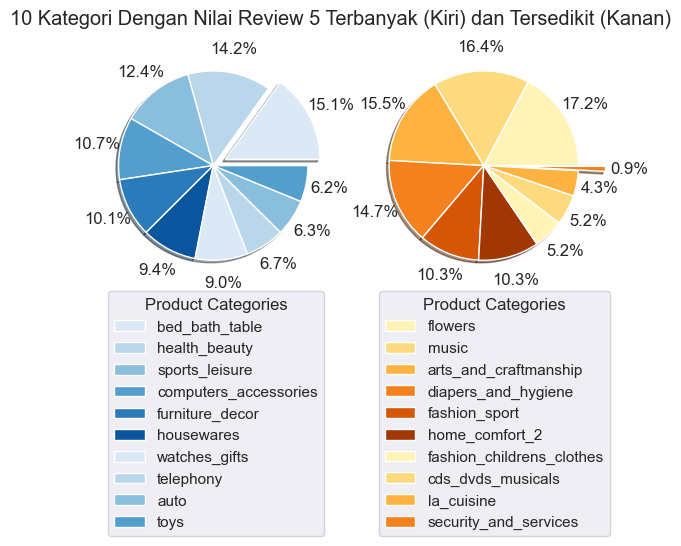

In [125]:
plt.subplot(1, 2, 1)
plt.pie(review_score_5.head(10).values,
        review_explode_most,
        review_score_5.head(10).keys(),
        sea.color_palette("Blues"),
        autopct = "%1.1f%%",
        pctdistance = 1.25,
        labeldistance = None,
        shadow = True,
        radius = 1.05)
plt.legend(review_score_5.head(10).keys(),
           title = "Product Categories",
           loc =  "center left",
           bbox_to_anchor = (0, -1.1, 0.5, 1))

plt.subplot(1, 2, 2)
plt.pie(review_score_5.tail(10).values,
        review_explode_least,
        review_score_5.tail(10).keys(),
        sea.color_palette("YlOrBr"),
        autopct = "%1.1f%%",
        pctdistance = 1.25,
        labeldistance = None,
        shadow = True,
        radius = 1.05)
plt.legend(review_score_5.tail(10).keys(),
           title = "Product Categories",
           loc =  "center left",
           bbox_to_anchor = (0, -1.1, 0.5, 1))

plt.suptitle("10 Kategori Dengan Nilai Review 5 Terbanyak (Kiri) dan Tersedikit (Kanan)", y = 0.82)
plt.show()

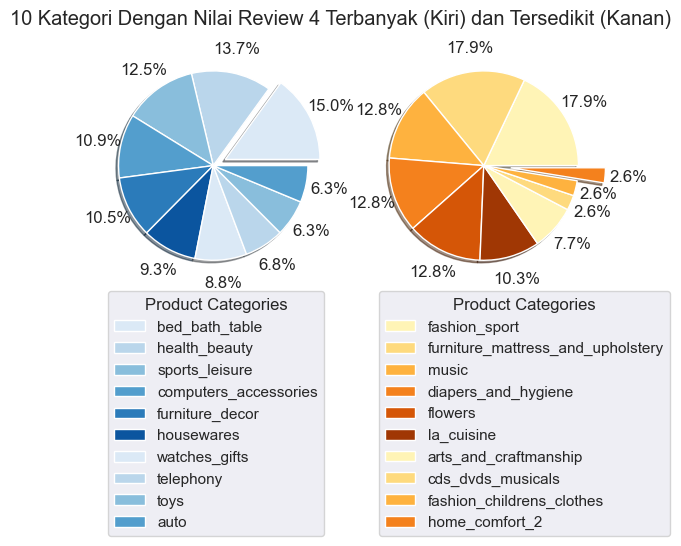

In [126]:
plt.subplot(1, 2, 1)
plt.pie(review_score_4.head(10).values,
        review_explode_most,
        review_score_4.head(10).keys(),
        sea.color_palette("Blues"),
        autopct = "%1.1f%%",
        pctdistance = 1.25,
        labeldistance = None,
        shadow = True,
        radius = 1.05)
plt.legend(review_score_4.head(10).keys(),
           title = "Product Categories",
           loc =  "center left",
           bbox_to_anchor = (0, -1.1, 0.5, 1))

plt.subplot(1, 2, 2)
plt.pie(review_score_4.tail(10).values,
        review_explode_least,
        review_score_4.tail(10).keys(),
        sea.color_palette("YlOrBr"),
        autopct = "%1.1f%%",
        pctdistance = 1.25,
        labeldistance = None,
        shadow = True,
        radius = 1.05)
plt.legend(review_score_4.tail(10).keys(),
           title = "Product Categories",
           loc =  "center left",
           bbox_to_anchor = (0, -1.1, 0.5, 1))

plt.suptitle("10 Kategori Dengan Nilai Review 4 Terbanyak (Kiri) dan Tersedikit (Kanan)", y = 0.82)
plt.show()

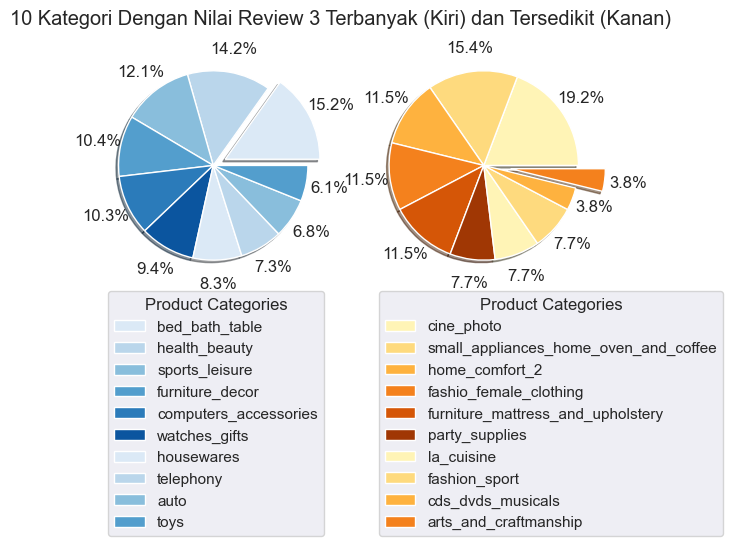

In [127]:
plt.subplot(1, 2, 1)
plt.pie(review_score_3.head(10).values,
        review_explode_most,
        review_score_3.head(10).keys(),
        sea.color_palette("Blues"),
        autopct = "%1.1f%%",
        pctdistance = 1.25,
        labeldistance = None,
        shadow = True,
        radius = 1.05)
plt.legend(review_score_3.head(10).keys(),
           title = "Product Categories",
           loc =  "center left",
           bbox_to_anchor = (0, -1.1, 0.5, 1))

plt.subplot(1, 2, 2)
plt.pie(review_score_3.tail(10).values,
        review_explode_least,
        review_score_3.tail(10).keys(),
        sea.color_palette("YlOrBr"),
        autopct = "%1.1f%%",
        pctdistance = 1.25,
        labeldistance = None,
        shadow = True,
        radius = 1.05)
plt.legend(review_score_3.tail(10).keys(),
           title = "Product Categories",
           loc =  "center left",
           bbox_to_anchor = (0, -1.1, 0.5, 1))

plt.suptitle("10 Kategori Dengan Nilai Review 3 Terbanyak (Kiri) dan Tersedikit (Kanan)", y = 0.82)
plt.show()

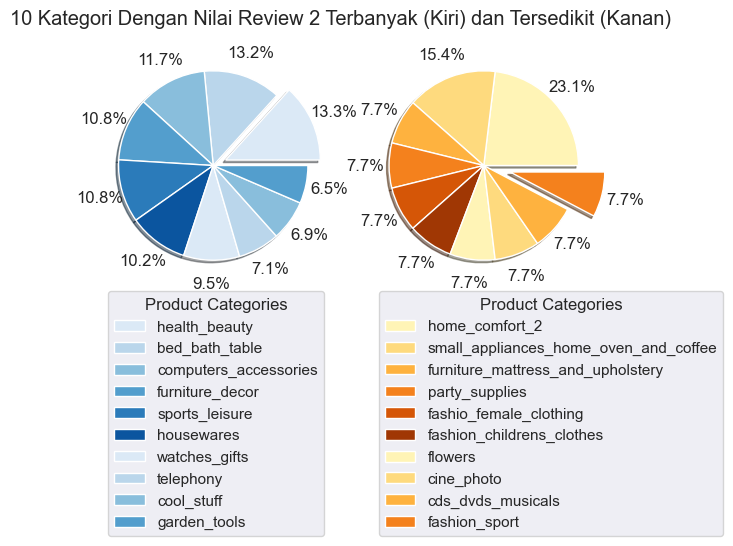

In [128]:
plt.subplot(1, 2, 1)
plt.pie(review_score_2.head(10).values,
        review_explode_most,
        review_score_2.head(10).keys(),
        sea.color_palette("Blues"),
        autopct = "%1.1f%%",
        pctdistance = 1.25,
        labeldistance = None,
        shadow = True,
        radius = 1.05)
plt.legend(review_score_2.head(10).keys(),
           title = "Product Categories",
           loc =  "center left",
           bbox_to_anchor = (0, -1.1, 0.5, 1))

plt.subplot(1, 2, 2)
plt.pie(review_score_2.tail(10).values,
        review_explode_least,
        review_score_2.tail(10).keys(),
        sea.color_palette("YlOrBr"),
        autopct = "%1.1f%%",
        pctdistance = 1.25,
        labeldistance = None,
        shadow = True,
        radius = 1.05)
plt.legend(review_score_2.tail(10).keys(),
           title = "Product Categories",
           loc =  "center left",
           bbox_to_anchor = (0, -1.1, 0.5, 1))

plt.suptitle("10 Kategori Dengan Nilai Review 2 Terbanyak (Kiri) dan Tersedikit (Kanan)", y = 0.82)
plt.show()

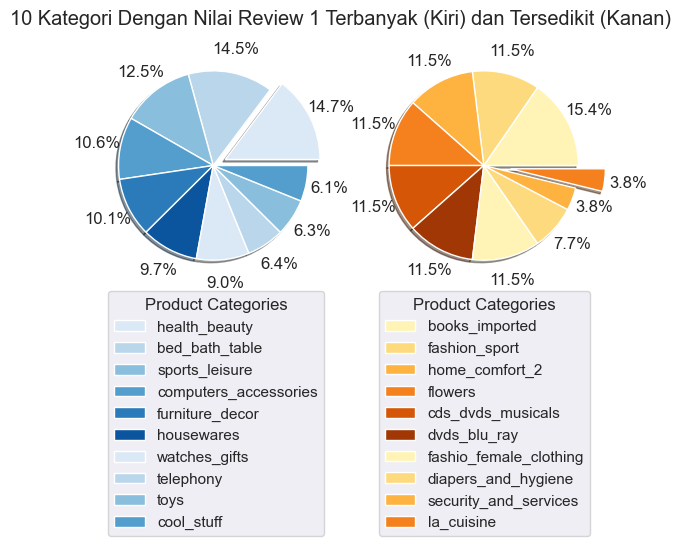

In [129]:
plt.subplot(1, 2, 1)
plt.pie(review_score_1.head(10).values,
        review_explode_most,
        review_score_1.head(10).keys(),
        sea.color_palette("Blues"),
        autopct = "%1.1f%%",
        pctdistance = 1.25,
        labeldistance = None,
        shadow = True,
        radius = 1.05)
plt.legend(review_score_1.head(10).keys(),
           title = "Product Categories",
           loc =  "center left",
           bbox_to_anchor = (0, -1.1, 0.5, 1))

plt.subplot(1, 2, 2)
plt.pie(review_score_1.tail(10).values,
        review_explode_least,
        review_score_1.tail(10).keys(),
        sea.color_palette("YlOrBr"),
        autopct = "%1.1f%%",
        pctdistance = 1.25,
        labeldistance = None,
        shadow = True,
        radius = 1.05)
plt.legend(review_score_1.tail(10).keys(),
           title = "Product Categories",
           loc =  "center left",
           bbox_to_anchor = (0, -1.1, 0.5, 1))

plt.suptitle("10 Kategori Dengan Nilai Review 1 Terbanyak (Kiri) dan Tersedikit (Kanan)", y = 0.82)
plt.show()

### 220170203

#### Pertanyaan 1
Berapakah rata rata  kategori terbesar dan terkecil dari jumlah foto yang dipublikasikan untuk produk?

In [130]:
category_photo = order_items[["product_category_name","product_photos_qty"]]
display(category_photo.head())

,product_category_name,product_photos_qty
0,cool_stuff,4.0
1,pet_shop,2.0
2,furniture_decor,2.0
3,perfumery,1.0
4,garden_tools,1.0


In [131]:
category_photo = category_photo.groupby("product_category_name")["product_photos_qty"].mean().sort_values(ascending = False)
display(category_photo.head())
display(category_photo.tail())

product_category_name
fashion_shoes                              5.229008
small_appliances_home_oven_and_coffee      4.197368
arts_and_craftmanship                      3.708333
fashion_bags_accessories                   3.701132
kitchen_dining_laundry_garden_furniture    3.508897
Name: product_photos_qty, dtype: float64

product_category_name
office_furniture    1.215849
flowers             1.121212
books_technical     1.074906
la_cuisine          1.071429
home_comfort_2      1.033333
Name: product_photos_qty, dtype: float64

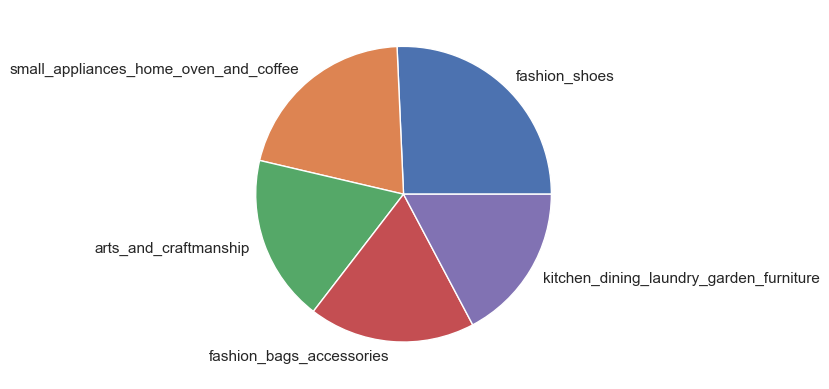

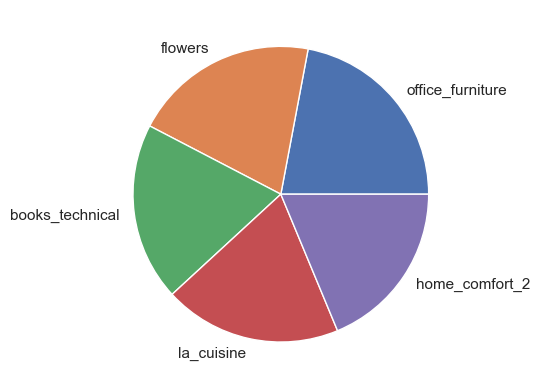

In [132]:
plt.pie(category_photo.head(), labels = category_photo.head().keys())
plt.show()
plt.pie(category_photo.tail(), labels = category_photo.tail().keys())
plt.show()

## Conclusion

### 10122079

#### Kesimpulan Pertanyaan 1
Apa 10 kategori produk dengan penjualan tertinggi?

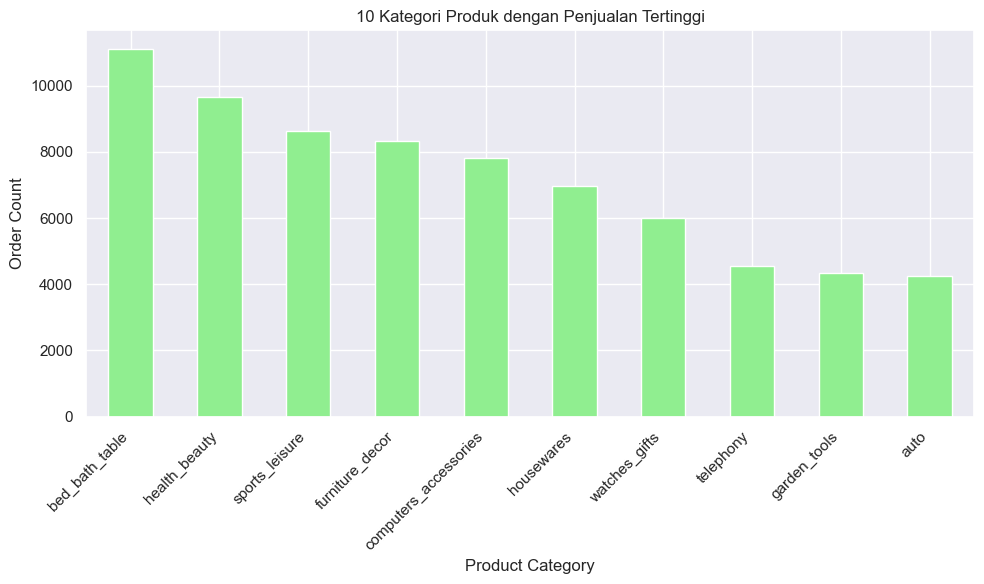

In [133]:
plt.figure(figsize=(10, 6))
max_order.plot(kind='bar', color='lightgreen')
plt.title('10 Kategori Produk dengan Penjualan Tertinggi')
plt.xlabel('Product Category')
plt.ylabel('Order Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

10 Kategori Produk dengan penjualan tertinggi adalah bed_bath_table, health_beauty, sports_leisure, furniture_decor, computers_accessories, housewares, watches_gifts, telephony, garden_tools, auto.

### 10122096

#### Kesimpulan Pertanyaan 1
Apakah Lama Pengiriman berpengaruh terhadap review score?

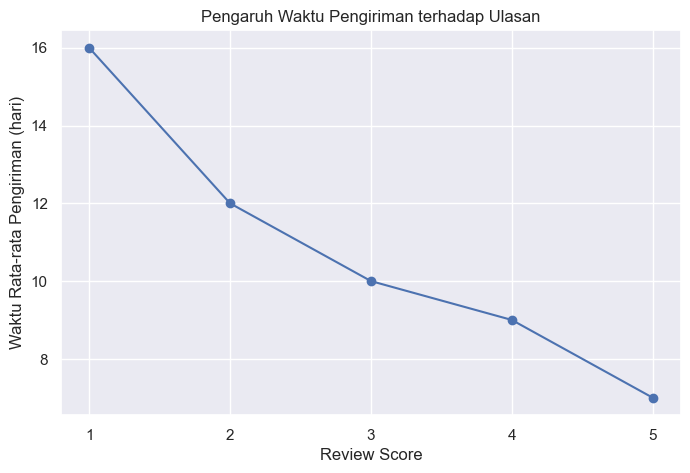

In [134]:
plt.figure(figsize=(8, 5))
plt.plot(avg_delivery_time_per_score.index, avg_delivery_time_per_score.dt.days, marker='o', linestyle='-')
plt.title('Pengaruh Waktu Pengiriman terhadap Ulasan')
plt.xlabel('Review Score')
plt.ylabel('Waktu Rata-rata Pengiriman (hari)')
plt.xticks(avg_delivery_time_per_score.index)
plt.grid(True)
plt.show()

Terlihat dari grafik diatas bahwa lama pengiriman cukup berpengaruh terhadap review score, hal yang bisa dilakukan adalah tahap processing ke shipped harus lebih diperbaiki untuk memperpendek jarak waktu dari kurir pada customer

#### Kesimpulan Pertanyaan 2
Apakah highlight yang membuat customer memberikan review score yang kecil?

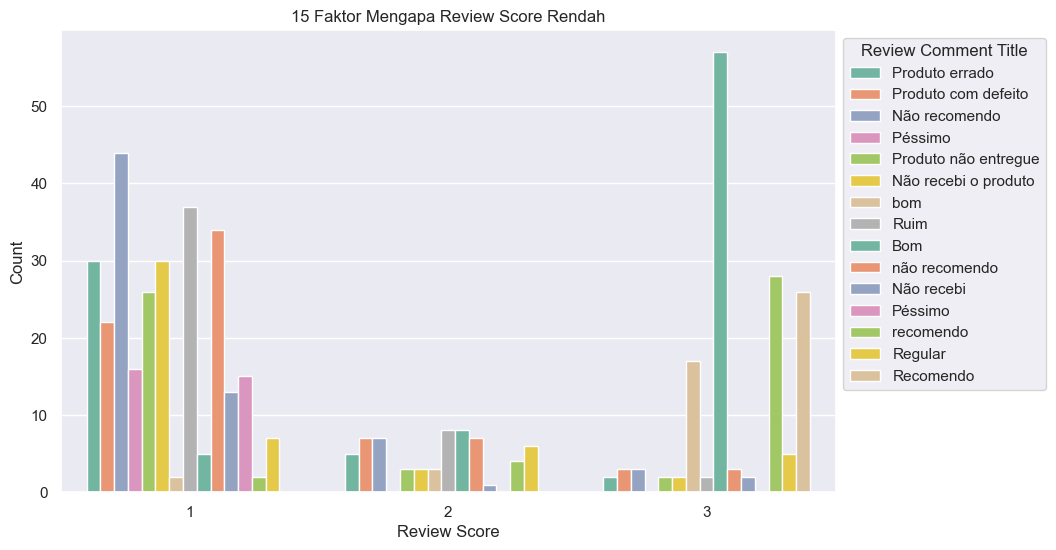

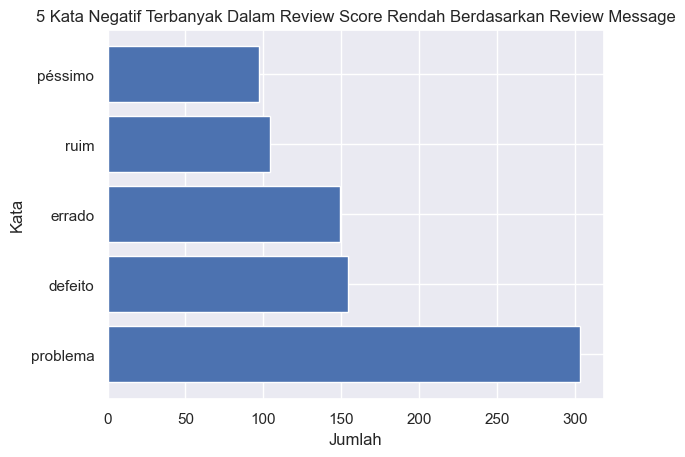

In [135]:
plt.figure(figsize=(10, 6))
sea.countplot(x='review_score', hue='review_comment_title', data=top_15_reasons, palette='Set2')
plt.title('15 Faktor Mengapa Review Score Rendah')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.legend(title='Review Comment Title', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

plt.barh(common_negative_df_pt['Kata'], common_negative_df_pt['Jumlah'])
plt.xlabel('Jumlah')
plt.ylabel('Kata')
plt.title('5 Kata Negatif Terbanyak Dalam Review Score Rendah Berdasarkan Review Message')
plt.show()

Berdasarkan Comment Title
<list>
    <li>Produto errado = Produk yang salah
    <li>Produto com defeito = Produk cacat
    <li>Nao recomendo = Tidak merekomendasikan
    <li>Pessimo = Sangat buruk
    <li>Producto nao entregue = Produk tidak terkirim
    <li>Ruim = Buruk
    <li>Nao recebi = Tidak diterima
</list>

Berdasarkan Comment Message
<list>
    <li> Problema = Bermasalah
    <li> Defeito = Cacat
    <li> Errado = Salah
    <li> Ruim = Buruk
    <li> Pessimo = Sangat Buruk
</list>

Ada beberapa hal yang harus diperhatikan dan diperbaiki dari alasan mengapa customer memberi review score rendah, seperti produk yang salah, cacat, bahkan tidak terkirim.

#### Kesimpulan Pertanyaan 3
Apakah kesamaan negara asal antara seller dan customer berpengaruh terhadap jumlah pembelian?

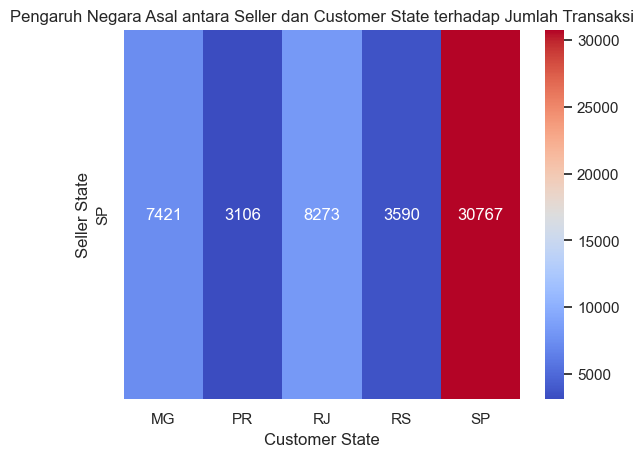

In [136]:
sea.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='g')
plt.title('Pengaruh Negara Asal antara Seller dan Customer State terhadap Jumlah Transaksi')
plt.xlabel('Customer State')
plt.ylabel('Seller State')
plt.show()

Terlihat dari heatmap diatas bahwa kesamaan daerah asal antara seller dan customer sangat berpengaruh terhadap jumlah pembelian barang

#### Kesimpulan Pertanyaan 4
Berapakah rata-rata jauh pengiriman yang sudah diterima berdasarkan seller state?

C:\Users\Acer\AppData\Local\Temp\ipykernel_18836\2284311752.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(data=rata_rata_jarak2, x='seller_state', y='distance_KM', palette='viridis')


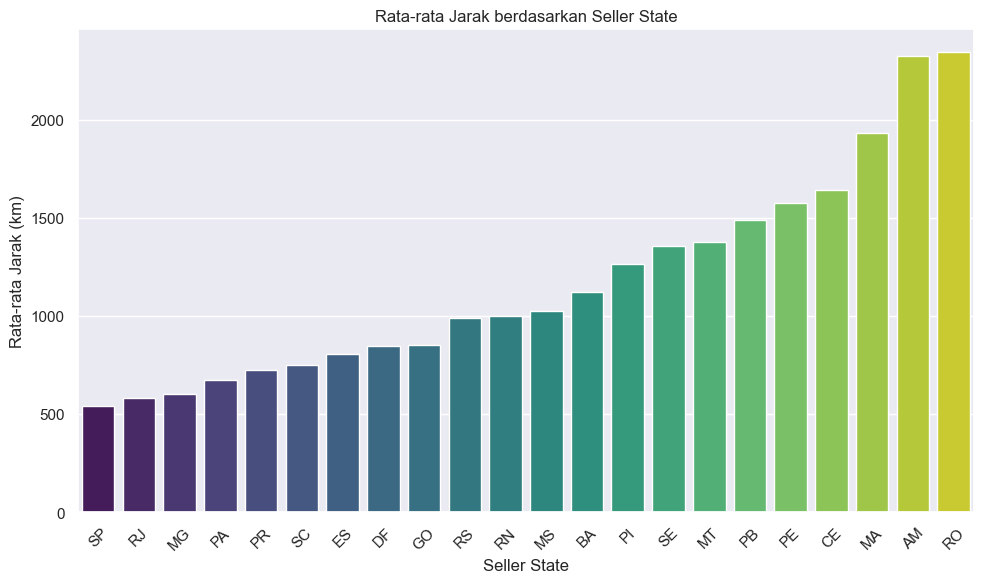

In [137]:
sea.set_theme()

plt.figure(figsize=(10, 6))
sea.barplot(data=rata_rata_jarak2, x='seller_state', y='distance_KM', palette='viridis')
plt.xlabel('Seller State')
plt.ylabel('Rata-rata Jarak (km)')
plt.title('Rata-rata Jarak berdasarkan Seller State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

dari grafik diatas bisa kita lihat bahwa SP merupakan seller state yang paling kecil rata-rata jarak pengirimannya, dan cocok dengan analasis pertanyaan sebelumnya tentang SP adalah seller state dengan tingkat populer yang tinggi berdasarkan kesamaan state customer, yang cukup menjadi salah satu alasan mengapa seller state SP tingkat pembelinya tinggi

### Kesimpulan Pertanyaan 5
Apakah jauh pengiriman berdampak pada waktu pengiriman dan review score?

,distance_KM,delivery_time,review_score
distance_KM,1.000000,0.614977,-0.065554
delivery_time,0.614977,1.000000,-0.195204
review_score,-0.065554,-0.195204,1.000000


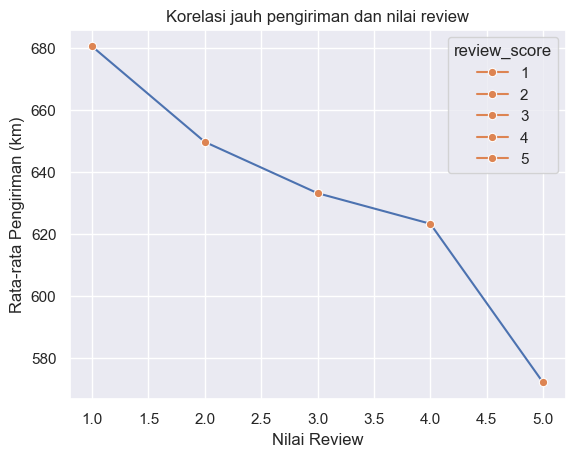

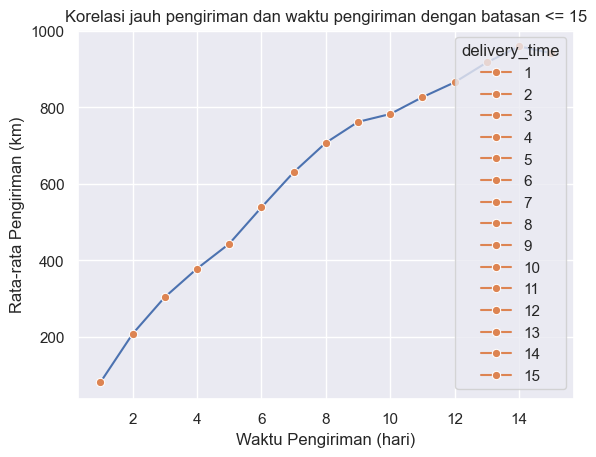

In [138]:
display(orders_review_df.corr("spearman"))

sea.lineplot(x = review_distance_df.keys(), y = review_distance_df.values)
sea.lineplot(x = review_distance_df.keys(), y = review_distance_df.values, style = review_distance_df.keys(), 
             markers =["o", "o", "o", "o", "o"], 
             dashes = False)
plt.title("Korelasi jauh pengiriman dan nilai review")
plt.xlabel("Nilai Review")
plt.ylabel("Rata-rata Pengiriman (km)")
plt.show()

sea.lineplot(x = mean_distance_deliver_time_df.keys(), y = mean_distance_deliver_time_df.values)
sea.lineplot(x = mean_distance_deliver_time_df.keys(), y = mean_distance_deliver_time_df.values, 
             style = mean_distance_deliver_time_df.keys(), 
             markers =["o", "o", "o", "o", "o", "o","o","o","o","o","o","o","o","o","o",], 
             dashes = False)
plt.title("Korelasi jauh pengiriman dan waktu pengiriman dengan batasan <= 15")
plt.xlabel("Waktu Pengiriman (hari)")
plt.ylabel("Rata-rata Pengiriman (km)")
plt.show()

<li>Korelasi Jauh Pengiriman pada Nilai Review</li>
walaupun memang grafik terlihat signifikan semakin kecil reviewnya maka rata2 jaraknya semakin jauh pula, tetapi pada tabel korelasi antara distance dan review score hanya (-0.064719) maka hampir tidak ada pengaruh sama sekali.
<li>Korelasi Jauh Pengiriman pada Waktu Pengiriman</li>
dari grafik dan tabel korelasi diatas dapat dilihat bahwa jarak pengiriman cukup berpegaruh terhadap waktu pegiriman dengan korelasi (0.615205) dan grafiknya menggambarkan kenaikan yang signifikan


### 10122104

#### Kesimpulan Pertanyaan 1
Apakah barang yang datang ke costumer melebihi tanggal estimasinya dapat mempengaruhi pembatalan pesanan?

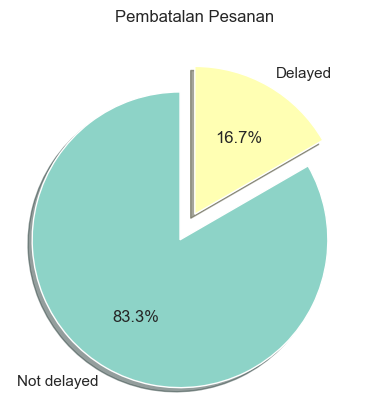

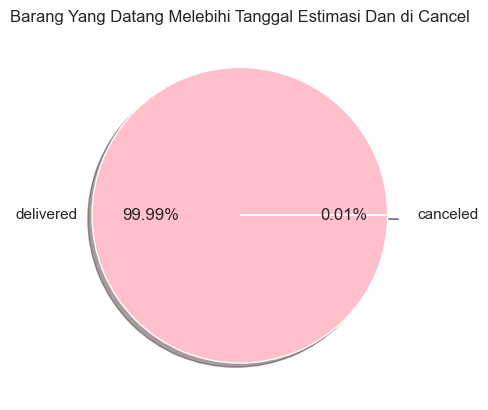

In [139]:
labels    = ['Not delayed', 'Delayed']
myexplode = [0.2,0]
colors    = sea.color_palette('Set3')

plt.pie(grup1, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, explode=myexplode)
plt.title('Pembatalan Pesanan')
plt.show()

labels    = ['canceled', 'delivered']
myexplode = [0.10,0]
colors    = ['blue','pink']

plt.pie(grup2, labels=labels, colors=colors, autopct='%1.2f%%',  shadow=True, explode=myexplode)
plt.title('Barang Yang Datang Melebihi Tanggal Estimasi Dan di Cancel')
plt.show()

Keterlambatan kedatangan barang kepada konsumen melebihi estimasi tidak mempengaruhi secara besar dalam pembatalan pesanan.

#### Kesimpulan Pertanyaan 2
Kategori barang apa yang paling banyak dibeli?

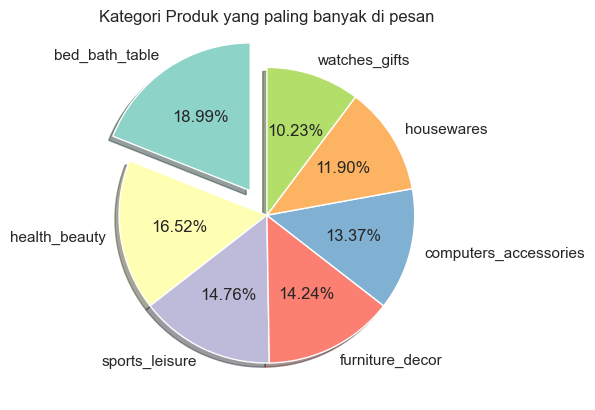

In [140]:
myexplode = [0.2 ,0 ,0 ,0 ,0 ,0 ,0]
plt.pie(categories_count.head(7).values, labels = categories_count.head(7).keys(), explode=myexplode, shadow=True, colors=sea.color_palette('Set3'), autopct='%1.2f%%', startangle=90)
plt.title(label="Kategori Produk yang paling banyak di pesan")
plt.show()

Kategori Produk yang sering dipesan adalah bed_bath_table.

### 10122105

#### Kesimpulan Pertanyaan 1
Apa 10 kategori produk dengan penjualan terendah?

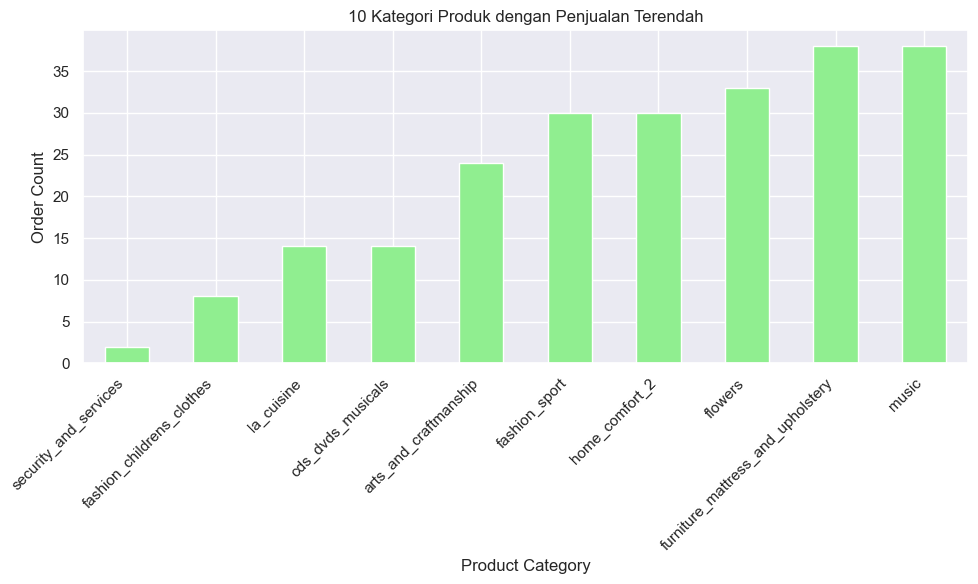

In [141]:
plt.figure(figsize=(10, 6))
min_order.plot(kind='bar', color='lightgreen')
plt.title('10 Kategori Produk dengan Penjualan Terendah')
plt.xlabel('Product Category')
plt.ylabel('Order Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

10 Kategori Produk dengan penjualan terendah adalah security_and_service, fashion_childrens_clothes, la_cuisine, cds_dvds_musicals, arts_and_craftmanship, fashion_sport, home_comfort_2, flowers, furniture_mattress_and_upholstery, music.

### 10122114

#### Kesimpulan Pertanyaan 1
Berapa kemungkinan harga pengiriman suatu barang yang memiliki berat, panjang, tinggi, dan lebar rata-rata dari seluruh data barang yang sudah ada?

In [142]:
means = [[itemsDf["product_weight_g"].mean(), itemsDf["product_volume_cm"].mean()]]

print("Rata-rata berat barang            :", means[0][0])
print("Rata-rata volume barang           :", means[0][1])
print("Perkiraan harga pengiriman barang :", quantile_regressor.predict(means))
print("Rata-rata harga pengiriman barang :", order_items["freight_value"].mean())

Rata-rata berat barang            : 2108.657148732713
Rata-rata volume barang           : 15273.488057169297
Perkiraan harga pengiriman barang : [18.40853503]
Rata-rata harga pengiriman barang : 20.025485039001275


Dari data yang didapat dari tabel order_items, dapat diketahui bahwa rata-rata berat barang ialah ~2.108,65715 $g$ dan rata-rata volume barang adalah ~15.273,48806 $cm^{3}$ . Dengan menggunakan algoritma pembelajaran mesin regresi kuantil, model akan dilatih dengan seluruh data berat dan volume barang yang ada. Setelah model selesai dilatih, dengan memasukkan rata-rata berat dan volume barang, model regresi dapat memprediksi harga pengiriman barang. Harga yang didapat dari model regresi tersebut ialah ~18,40853, di mana nilai tersebu tidak jauh dari rata-rata harga pengiriman barang yang sudah ada, yakni ~20,02548.

Kesimpulan dari pertanyaan ini ialah:
- Apabila ada suatu barang dengan berat dan volume yang mendekati rata-rata berat dan volume pada data tersebut, harga pengiriman yang harus dibayar berkisar pada 18 - 20 Brazilian Real.
- Model regresi hasil proses ini dapat dipakai untuk menentukan harga pengiriman, dikarenakan data prediksi dan data real tidak memiliki perbedaan yang siginfikan.

#### Kesimpulan Pertanyaan 2
Antara harga barang dan harga pengiriman, fitur mana yang lebih memengaruhi rating dari pembeli?

,price,freight_value,review_score
price,1.000000,0.440329,-0.000007
freight_value,0.440329,1.000000,0.001911
review_score,-0.000007,0.001911,1.000000


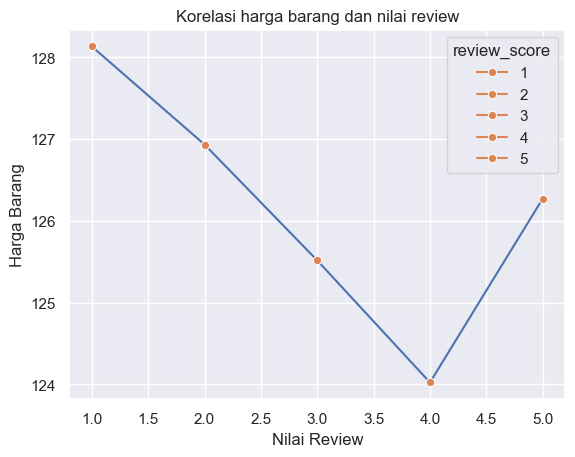

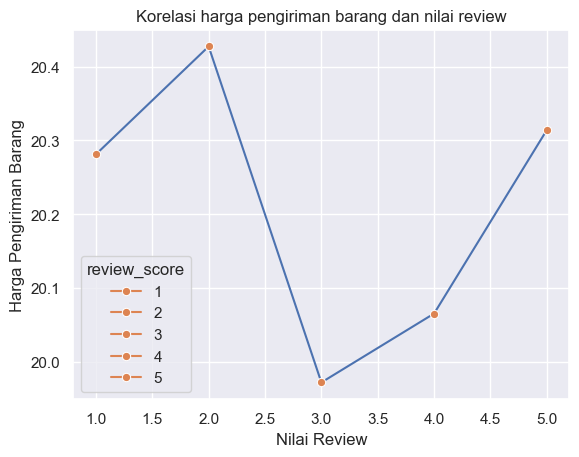

In [143]:
display(item_review_df.corr("spearman"))

sea.lineplot(x = price_review_df.keys(), y = price_review_df.values)
sea.lineplot(x = price_review_df.keys(), y = price_review_df.values, style = price_review_df.keys(), markers =["o", "o", "o", "o", "o"], dashes = False)
plt.title("Korelasi harga barang dan nilai review")
plt.xlabel("Nilai Review")
plt.ylabel("Harga Barang")
plt.show()

sea.lineplot(x = freight_review_df.keys(), y = freight_review_df.values)
sea.lineplot(x = freight_review_df.keys(), y = freight_review_df.values, style = freight_review_df.keys(), markers =["o", "o", "o", "o", "o"], dashes = False)
plt.title("Korelasi harga pengiriman barang dan nilai review")
plt.xlabel("Nilai Review")
plt.ylabel("Harga Pengiriman Barang")
plt.show()

Apabila dilihat dari nilai korelasi antara harga barang dengan nilai review (-0,000007) dan nilai korelasi antara harga pengiriman barang dan nilai review (0,001911), dapat diketahui bahwa harga barang dan harga pengiriman barang hampir tidak memiliki pengaruh sama sekali kepada nilai review. Hal ini dapat dibuktikan juga pada kedua grafik diatas, tidak ada pola signifikan yang dapat menunjukan hubungan antara ketiga variabel.

Kesimpulan dari pertanyaan ini ialah:
- Harga barang dan harga pengiriman barang tidak memiliki pengaruh yang signifikan terhadap nilai review yang diberikan oleh pengguna.
- Harga pengiriman barang (0,001911) memiliki pengaruh yang lebih besar dibandingkan harga barang (-0,000007) kepada nilai review, walaupun hampir tidak memiliki pengaruh. 

#### Kesimpulan Pertanyaan 3

Bagaimana persebaran kategori barang pada setiap nilai review?

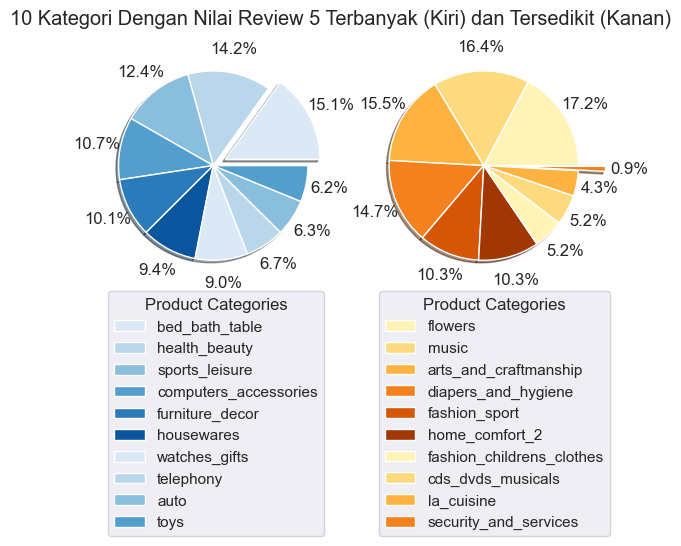

In [144]:
plt.subplot(1, 2, 1)
plt.pie(review_score_5.head(10).values,
        review_explode_most,
        review_score_5.head(10).keys(),
        sea.color_palette("Blues"),
        autopct = "%1.1f%%",
        pctdistance = 1.25,
        labeldistance = None,
        shadow = True,
        radius = 1.05)
plt.legend(review_score_5.head(10).keys(),
           title = "Product Categories",
           loc =  "center left",
           bbox_to_anchor = (0, -1.1, 0.5, 1))

plt.subplot(1, 2, 2)
plt.pie(review_score_5.tail(10).values,
        review_explode_least,
        review_score_5.tail(10).keys(),
        sea.color_palette("YlOrBr"),
        autopct = "%1.1f%%",
        pctdistance = 1.25,
        labeldistance = None,
        shadow = True,
        radius = 1.05)
plt.legend(review_score_5.tail(10).keys(),
           title = "Product Categories",
           loc =  "center left",
           bbox_to_anchor = (0, -1.1, 0.5, 1))

plt.suptitle("10 Kategori Dengan Nilai Review 5 Terbanyak (Kiri) dan Tersedikit (Kanan)", y = 0.82)
plt.show()

Pada grafik, dapat terlihat bahwa kategori tempat tidur, kamar mandi, dan meja merupakan kategori produk yang memiliki nilai review 5 terbanyak, sedangkan kategori layanan dan keamanan merupakan kategori dengan nilai review 5 tersedikit.

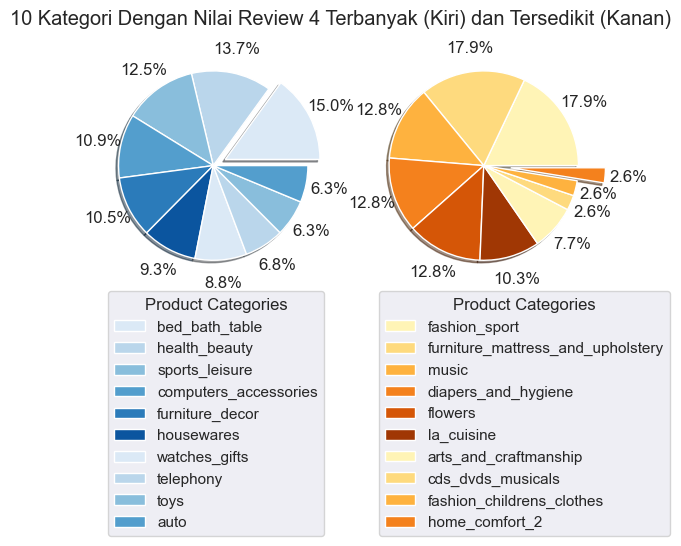

In [145]:
plt.subplot(1, 2, 1)
plt.pie(review_score_4.head(10).values,
        review_explode_most,
        review_score_4.head(10).keys(),
        sea.color_palette("Blues"),
        autopct = "%1.1f%%",
        pctdistance = 1.25,
        labeldistance = None,
        shadow = True,
        radius = 1.05)
plt.legend(review_score_4.head(10).keys(),
           title = "Product Categories",
           loc =  "center left",
           bbox_to_anchor = (0, -1.1, 0.5, 1))

plt.subplot(1, 2, 2)
plt.pie(review_score_4.tail(10).values,
        review_explode_least,
        review_score_4.tail(10).keys(),
        sea.color_palette("YlOrBr"),
        autopct = "%1.1f%%",
        pctdistance = 1.25,
        labeldistance = None,
        shadow = True,
        radius = 1.05)
plt.legend(review_score_4.tail(10).keys(),
           title = "Product Categories",
           loc =  "center left",
           bbox_to_anchor = (0, -1.1, 0.5, 1))

plt.suptitle("10 Kategori Dengan Nilai Review 4 Terbanyak (Kiri) dan Tersedikit (Kanan)", y = 0.82)
plt.show()

Pada grafik, dapat terlihat bahwa kategori tempat tidur, kamar mandi, dan meja merupakan kategori produk yang memiliki nilai review 4 terbanyak, sedangkan kategori kenyamanan rumah merupakan kategori dengan nilai review 4 tersedikit.

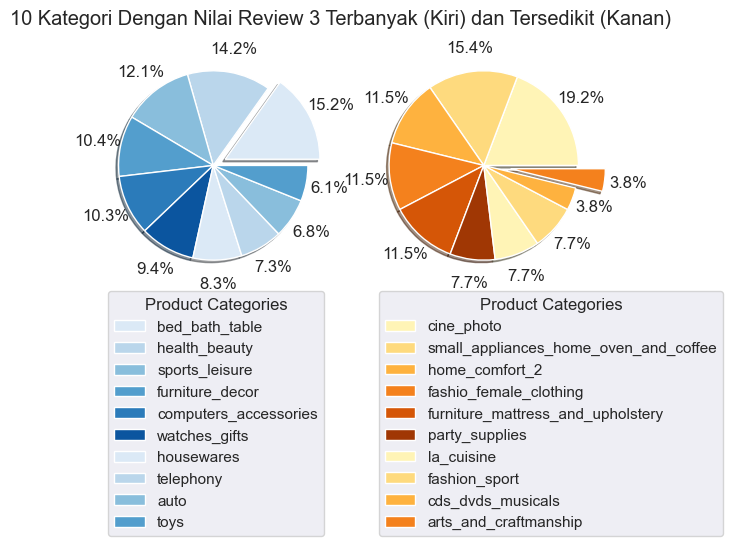

In [146]:
plt.subplot(1, 2, 1)
plt.pie(review_score_3.head(10).values,
        review_explode_most,
        review_score_3.head(10).keys(),
        sea.color_palette("Blues"),
        autopct = "%1.1f%%",
        pctdistance = 1.25,
        labeldistance = None,
        shadow = True,
        radius = 1.05)
plt.legend(review_score_3.head(10).keys(),
           title = "Product Categories",
           loc =  "center left",
           bbox_to_anchor = (0, -1.1, 0.5, 1))

plt.subplot(1, 2, 2)
plt.pie(review_score_3.tail(10).values,
        review_explode_least,
        review_score_3.tail(10).keys(),
        sea.color_palette("YlOrBr"),
        autopct = "%1.1f%%",
        pctdistance = 1.25,
        labeldistance = None,
        shadow = True,
        radius = 1.05)
plt.legend(review_score_3.tail(10).keys(),
           title = "Product Categories",
           loc =  "center left",
           bbox_to_anchor = (0, -1.1, 0.5, 1))

plt.suptitle("10 Kategori Dengan Nilai Review 3 Terbanyak (Kiri) dan Tersedikit (Kanan)", y = 0.82)
plt.show()

Pada grafik, dapat terlihat bahwa kategori tempat tidur, kamar mandi, dan meja merupakan kategori produk yang memiliki nilai review 3 terbanyak, sedangkan kategori seni dan keahlian merupakan kategori dengan nilai review 3 tersedikit.

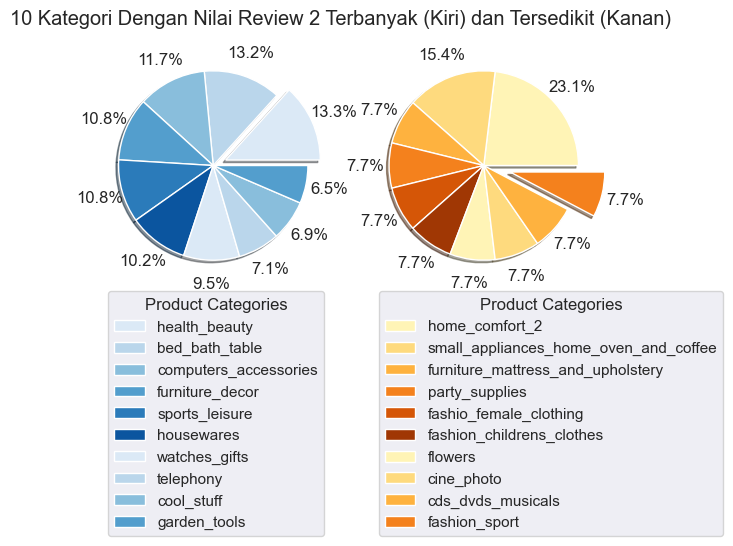

In [147]:
plt.subplot(1, 2, 1)
plt.pie(review_score_2.head(10).values,
        review_explode_most,
        review_score_2.head(10).keys(),
        sea.color_palette("Blues"),
        autopct = "%1.1f%%",
        pctdistance = 1.25,
        labeldistance = None,
        shadow = True,
        radius = 1.05)
plt.legend(review_score_2.head(10).keys(),
           title = "Product Categories",
           loc =  "center left",
           bbox_to_anchor = (0, -1.1, 0.5, 1))

plt.subplot(1, 2, 2)
plt.pie(review_score_2.tail(10).values,
        review_explode_least,
        review_score_2.tail(10).keys(),
        sea.color_palette("YlOrBr"),
        autopct = "%1.1f%%",
        pctdistance = 1.25,
        labeldistance = None,
        shadow = True,
        radius = 1.05)
plt.legend(review_score_2.tail(10).keys(),
           title = "Product Categories",
           loc =  "center left",
           bbox_to_anchor = (0, -1.1, 0.5, 1))

plt.suptitle("10 Kategori Dengan Nilai Review 2 Terbanyak (Kiri) dan Tersedikit (Kanan)", y = 0.82)
plt.show()

Pada grafik, dapat terlihat bahwa kategori kesehatan dan kecantikan merupakan kategori produk yang memiliki nilai review 2 terbanyak, sedangkan kategori mode dan olahraga merupakan kategori dengan nilai review 2 tersedikit.

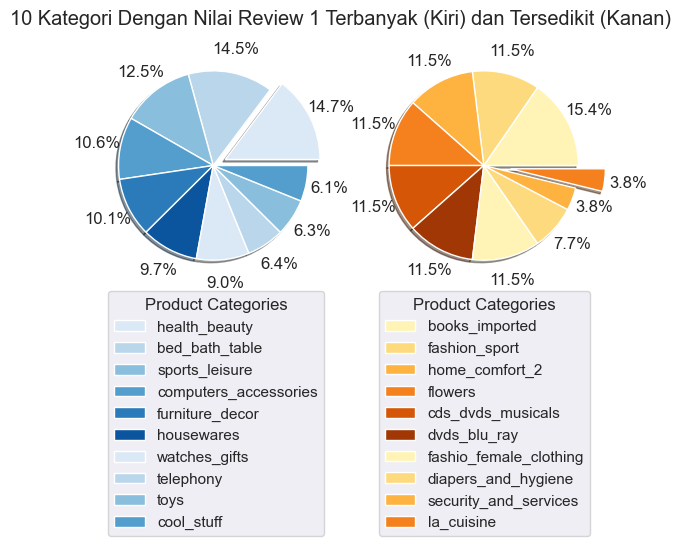

In [148]:
plt.subplot(1, 2, 1)
plt.pie(review_score_1.head(10).values,
        review_explode_most,
        review_score_1.head(10).keys(),
        sea.color_palette("Blues"),
        autopct = "%1.1f%%",
        pctdistance = 1.25,
        labeldistance = None,
        shadow = True,
        radius = 1.05)
plt.legend(review_score_1.head(10).keys(),
           title = "Product Categories",
           loc =  "center left",
           bbox_to_anchor = (0, -1.1, 0.5, 1))

plt.subplot(1, 2, 2)
plt.pie(review_score_1.tail(10).values,
        review_explode_least,
        review_score_1.tail(10).keys(),
        sea.color_palette("YlOrBr"),
        autopct = "%1.1f%%",
        pctdistance = 1.25,
        labeldistance = None,
        shadow = True,
        radius = 1.05)
plt.legend(review_score_1.tail(10).keys(),
           title = "Product Categories",
           loc =  "center left",
           bbox_to_anchor = (0, -1.1, 0.5, 1))

plt.suptitle("10 Kategori Dengan Nilai Review 1 Terbanyak (Kiri) dan Tersedikit (Kanan)", y = 0.82)
plt.show()

Pada grafik, dapat terlihat bahwa kategori kesehatan dan kecantikan merupakan kategori produk yang memiliki nilai review 1 terbanyak, sedangkan kategori masakan merupakan kategori dengan nilai review 1 tersedikit.

Kesimpulan dari pertanyaan ini ialah:
- Kategori tempat tidur, kamar mandi, dan meja serta kategori kesehatan dan kecantikan merupakan kategori yang memiliki banyak data dalam setiap nilai review, sehingga ada kemungkinan bahwa kedua kategori ini merupakan kategori yang banyak dibeli.
- Penjualan barang dengan kategori tempat tidur, kamar mandi, dan meja kemungkinan memiliki standar yang tinggi dikarenakan banyaknya jumlah data yang memiliki nilai review 3 keatas.
- Penjualan barang dengan kategori kesehatan dan kecantikan kemungkinan memiliki standar yang rendah dikarenakan banyaknya jumlah data yang memiliki nilai review 1 dan 2.
- Kategori layanan dan keamanan, kenyamanan rumah, seni dan keahlian, mode dan olahraga, serta masakan merupakan kategori-kategori dengan jumlah nilai review yang sedikit, sehingga ada kemungkinan bahwa kategori-kategori ini tidak terlalu banyak dibeli.

### 220170203

#### Kesimpulan Pertanyaan 1
Berapakah rata rata  kategori terbesar dan terkecil dari jumlah foto yang dipublikasikan untuk produk?

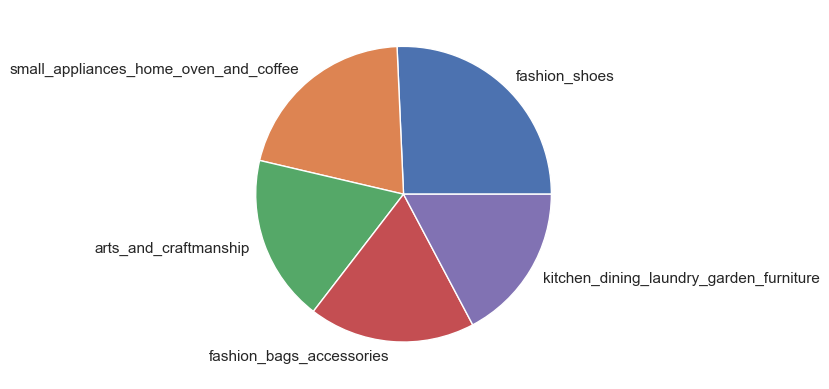

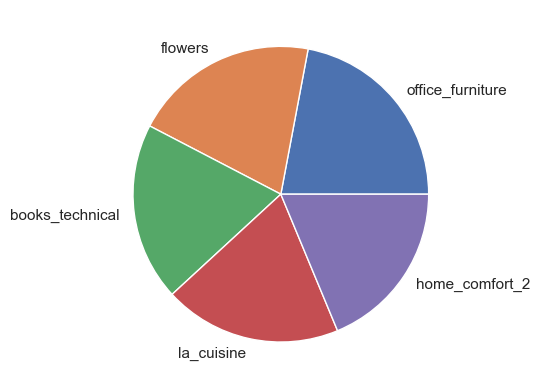

In [149]:
plt.pie(category_photo.head(), labels = category_photo.head().keys())
plt.show()
plt.pie(category_photo.tail(), labels = category_photo.tail().keys())
plt.show()

Dapat disimpulkan bahwa kategori terbesar dari jumlah foto yang di publikasikan adalah fashion shoes dengan rata rata 5.229008 adapun kategori terkecil dari jumlah foto yang dipublikasikan adalah home comfort 2 dengan rata rata 1.033333